<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px; ">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я буду проверять твой проект. Если не против, то давай общаться на «ты». 

Сразу хочу обратить внимание на цветовую разметку.
Зеленым помечены отличные решения и идеи, которые можно и нужно использовать в будущем. Желтым отмечено то, что можно или нужно оптимизировать, в зависимости от контекста. Красным обозначены грубые ошибки.
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме трех перечисленных.**
Также я попрошу тебя **не менять и не передвигать мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
Кроме того, комментарии у меня обозначены как заголовки. Это сбивает содержание, но при последующей проверке я могу снять с них заголовок, если тебе так будет удобнее. При этом они удобны, поскольку ты сразу можешь перейти к ним.   
        
<hr>
    
**По проекту:** работа сделана очень хорошо, все оформлено аккуратно и понятно. Есть некоторые замечания, я все обозначила в комментариях. Буду ждать работу на повторное ревью.
</div>


<div style="border:solid red 2px; padding: 20px">
Светлана, добрый день!

Благодарю за проверку моей работы! Я постарался исправить все ошибки, следуя твоим рекомендациям. Спасибо за ценные советы. Свои комментарии по обновленному коду я поместил в красные рамки, а обновленные выводы **выделил жирным**.
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px; ">
<b> Комментарий ревьюера 2</b>
    
Я все исправления увидела, отличная работа. Также я оставила комментарий по ситуации с неопределенными рейтингами. По работе вопросов больше нет, так что я ее принимаю и желаю тебе успехов :)
</div>

# Сборный проект. Исследование продаж компьютерных игр. 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.



### Откройте файл с данными и изучите общую информацию. 

In [1]:
#вызовем библиотеки, необходимые для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set(color_codes=True)


#откроем массив данных и посмотрим общую информацию по нему
data = pd.read_csv('/datasets/games.csv')
display(data.head())
data.info()

#изучим пропуски
fornoname = data['Name']
data_noname = data.query('Name != @fornoname')
display(data_noname.head())

fornoyear = data['Year_of_Release']
data_noyear = data.query('Year_of_Release == @fornoyear')
display(data_noyear.head())
print(data_noyear['Platform'].value_counts())
print(data_noyear['Genre'].value_counts())

data_nocrscore = data.query('Critic_Score == "NaN"')
display(data_nocrscore.head())
print(data_nocrscore['Platform'].value_counts())
print(data_nocrscore['Genre'].value_counts())
print(data_nocrscore['Year_of_Release'].value_counts())

foruserscore = data['User_Score']
data_nousscore = data.query('User_Score != @foruserscore')
display(data_nousscore.head())
print(data_nousscore['Platform'].value_counts())
print(data_nousscore['Genre'].value_counts())
print(data_nousscore['Year_of_Release'].value_counts())

forrating = data['Rating']
data_norating = data.query('Rating != @forrating')
display(data_norating.head())
print(data_norating['Year_of_Release'].value_counts())

#проверим дубликаты
print('Количество дубликатов в названии игр', data['Name'].duplicated().sum())
print(data['Name'].value_counts())
data_NFS = data.query('Name == "Need for Speed: Most Wanted"')
display(data_NFS)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: Genre, dtype: int64


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
PSV      310
PC       259
SNES     239
SAT      173
PS4      140
2600     133
GC       108
XB        99
GB        98
NES       98
XOne      78
WiiU      57
DC        38
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64
Action          1479
Misc            1227
Sports          1154
Adventure        980
Role-Playing     761
Simulation       521
Racing           507
Fighting         440
Platform         391
Strategy         381
Shooter          379
Puzzle           356
Name: Genre, dtype: int64
2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


PS      990
DS      879
PS2     680
PSP     665
PS3     367
Wii     320
N64     319
GBA     305
3DS     290
PSV     280
SNES    239
X360    212
SAT     173
PC      155
2600    133
PS4     129
NES      98
GB       98
XB       88
GC       87
XOne     54
WiiU     42
DC       38
GEN      29
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: Platform, dtype: int64
Action          1163
Misc             862
Adventure        844
Sports           832
Role-Playing     725
Fighting         411
Racing           375
Strategy         333
Platform         321
Shooter          300
Simulation       292
Puzzle           241
Name: Genre, dtype: int64
2010.0    457
2008.0    440
2011.0    418
2009.0    407
2007.0    376
1998.0    348
2006.0    330
1999.0    299
2012.0    290
2015.0    271
1997.0    270
1996.0    255
2005.0    235
2014.0    231
2013.0    225
1995.0    219
2016.0    206
2000.0    200
2002.0    173
2004.0    166
2003.0    164
2001.0    143
1994.0    120

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     62
1981.0     46
1991.0     41
1992.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1987.0     16
1990.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: Year_of_Release, dtype: int64
Количество дубликатов в названии игр 5155
Need for Speed: Most Wanted                 12
Ratatouille                                  9
LEGO Marvel Super Heroes                     9
FIFA 14                                      9
Madden NFL 07                                9
                                            ..
Warhammer 40,000: Dawn of War: Soulstorm     1
Pheasants Forever Wingshooter                1
Tokimeki no Houkago         

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


**Вывод**

Представлен набор данных содержит 11 столбцов и 16715 строк. В данных обнаружены следующие проблемы:
1. Прропущенные значения в столцах с информацией о названии игры(Name), годе выпуска игры(Year_of_Release), жанре игры(Genre), оценке критиков(Critic_Score), оценке игроков(User_Score), и значениях возрастной категории игры(Rating)
2. Неверный формат данных в столбцах с датой выхода игры и оценкой игроков 
3. Изучив возникшие пропуски обнаружены следующие закономерности:
    * Пропуски в столбце с названием игры есть у двух игр, выпущенных для платформы GEN (используется для Sega Mega Drive, Sega Genesis). Игра в строке с индексом 659 имела релизы только в Северной Америке и Европе, а игра в строке с индексом 14244 имела релиз только в Японии. Также по этим играм отсутстсуют другие данные, связанные с оценками и возрастным рейтингом жанром. Изучив дополнительную информацию в открытом списке выпущенных игр, обнаружено несколько десятков игр, которые подходят под эти параметры, поэтому мы не можем сделать однозначный вывод, что это за игры, чтобы восполнить недостающую информацию. Эти пропуски являются, на мой взгляд, уникальными и могли возникнуть в следствие человеческой ошибки. В дальнейшем эти строки предлагаю удалить. Ссылка на список игр: https://ru.wikipedia.org/wiki/Список_игр_на_Sega_Mega_Drive
    * Пропуски обнаруженные в столбце с информацией о годе выпуска игры могли возникнуть автоматически при сведении баз данных по различным платформам или жанрам. На следующем этапе мы побробнее изучим варианты их устранения. При этом, в названиях некоторых игр указан год выпуска. 
    * Пропуски в столбцах с данными об оценке критиков и пользователей не имеют прямой связи с платформой, годом выпуска или жанром игры. Проверив выборочно информацию по некоторым играм, выбранных случаййным образом, в сети Интернет, были обнаружены оценки китиков и пользователей. Эти пропуски могли возникнуть, либо при объединении баз данных, либо по причине неподдержания данных в актуальном состоянии, информация об играх могла формироваться в момент, когда оценки либо не были выставлены, либо не опубликованы. Также при визуальной оценке количества значений, можно предположить, то оценки, а также возрастной рейтинг не были выставлены по одним и тем же играм, в дальнешем это можно проверить.
4. Названия столбцов записаны буквами разного регистра, что может усложнить работу и привести к возникновению ошибок.
5. В названиях иг встречаются дубликаты. При рассмотрении примера с самой часто встречающейся игрой, можно предположить, что повторы не являются дубликатами, так как игры выпущены для разных игровых платформ. 

### Подготовьте данные

In [2]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.rename(columns={'name': 'game'}, inplace=True)
data.columns

Index(['game', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [3]:
#изменим тип данных
#в столбце с оценками игроков есть значение tbd, заменим его на -1
data['user_score'].unique()
data['user_score'] = np.where((data.user_score == 'tbd'), -1, data.user_score)
data['user_score'] = data['user_score'].astype('float64')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [4]:
#изменим формат даты
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year
data['year_of_release'] = data['year_of_release'].astype('Int64')
display(data.head())
data.info()

,game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [5]:
#удалим пропуски в столбце с названием игр
data.dropna(subset = ['game'], inplace = True)

In [6]:
#обработаем пропуски в годе выхода
print('Количество пропусков в столбце с годом релиза:, {:.1%}'.format(data['year_of_release'].isnull().sum()/data['year_of_release'].count()))
#оставим без изменений

Количество пропусков в столбце с годом релиза:, 1.6%


In [7]:
#обработаем пропуски в столбцах с оценками
print('Количество пропусков в столбце с оценкой игроков:, {:.1%}'.format(data['user_score'].isnull().sum()/data['user_score'].count()))
print('Количество пропусков в столбце с оценкой критиков:, {:.1%}'.format(data['critic_score'].isnull().sum()/data['critic_score'].count()))
data['user_score'] = data['user_score'].fillna(-1)
print('Корреляция между оценками пользователей и критиков:', data['critic_score'].corr(data['user_score']))
data['critic_score'] = data['critic_score'].fillna(-1)
data.info()

Количество пропусков в столбце с оценкой игроков:, 66.9%
Количество пропусков в столбце с оценкой критиков:, 105.4%
Корреляция между оценками пользователей и критиков: 0.43839151192718595
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
game               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


<div style="border:solid red 2px; padding: 20px">
Код обновлен, в новый столбце включены данные по играм с отсутствующим рейтингом.
</div>

In [8]:
#обработаем пропуски в столбце с возратсной оценкой игры
print(data['rating'].unique())
data['rating'] = data['rating'].fillna('norating')
data['rating'] = data['rating'].replace("RP", "norating")
data.info()

#исправим значения в столбце с возрастным рейтингом:
#создадим словарь
ESRB = {"E": "Для всех", "M": "больше 17 лет", "T": "13-19 лет", "E10+": "больше 10 лет", "K-A": "Для всех", "AO": "Взрослые", "EC": "Для детей МВ", "norating": "Нет рейтинга"}
data['rating_rus'] = data['rating'].map(ESRB)
data['rating_rus'].unique()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
game               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


array(['Для всех', 'Нет рейтинга', 'больше 17 лет', '13-19 лет',
       'больше 10 лет', 'Взрослые', 'Для детей МВ'], dtype=object)

In [9]:
#создадим столбец с сумарными продажами игр
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
game               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
rating_rus         16713 non-null object
all_sales          16713 non-null float64
dtypes: Int64(1), float64(7), object(5)
memory usage: 1.8+ MB


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Забыл остальные регионы.
</div>

<div style="border:solid red 2px; padding: 20px">
Спасибо, поправил. Невнимательность - моя проблема, с которой я борюсь))
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Не только твоя :)
</div>

**Вывод**

Произведена следующая обработка данных:

1. Приведены названия столбцов к нижнему регистру
2. Изменен тип данных в столбцах с датой выхода игры и оценкой игроков
3. Обработаны данные со значением 'tbd'. Согласно данным портала fb.ru (URL: https://fb-ru.turbopages.org/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie) аббревиатура образована от To Be Determined, что дословно переводиться как "Требует определения". Этот рейтинг определеяется, когда игра имеет недостаточное количество отзывов для подсчета рейтинга. Это может быть связано ли с тем, что игра не популярна и в нее играет мало пользователей, либо игра вышла давно и тогда оценок не применяли, либо игра вышла недавно (относительно даты формирования датасета) и пользователи не успели ее оценить. В нашем случае 'tbd' фактически и является пропущенным значением, заменим его, как и пропуски на -1.
4. Удалили пропуски в столбце с названием игр, так как это всего две строки, в которых отсутствуют значения и в других столбцах. 
5. Пропуски в столбце с датой релиза игры оставим без изменений, так как это всего 1,6% от всех данных.
6. Пропуски в столбцах с оценкой мы заполнили значениями -1. Пропуски могли возникнуть потому что игра не была оценена кртиками или пользователями по причине, если игра вышла давно - система оценок не применялась, игра вышла недавно  - оценки не успелисформироваться, или игра является "необычно", рассчитаной либо на узкую аудиторию. тогда критики могли ее просто не оценить. а пользователи оценивать на ресурсах, которые не брались ля формирования базы данных. Было бы неправильно заполнить рейтинг игры средним или медианой. Поставим играм с пропусками рейтинг -1, чтобы отличать их от игр, у которых рейтинг действительно 0.
7. Произведена обработка данных возрастного рейтинга, система обозначений ESRB заменена на понятную. Данные взяты с русской Википедии: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

### Проведите исследовательский анализ данных

In [10]:
user_score_median = data.pivot_table(index = 'game', values = 'user_score', aggfunc = 'median').reset_index()
print(user_score_median['user_score'].isnull().sum())
user_score_median.rename(columns = {'user_score': 'user_score_med'}, inplace = True)
user_score_median.info()
data1 = data.merge(user_score_median, on = 'game', how = 'left')
data1.info()


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11559 entries, 0 to 11558
Data columns (total 2 columns):
game              11559 non-null object
user_score_med    11559 non-null float64
dtypes: float64(1), object(1)
memory usage: 180.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 14 columns):
game               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
rating_rus         16713 non-null object
all_sales          16713 non-null float64
user_score_med     16713 non-null float64
dtypes: Int64(1), float64(8), object(5)
memory usage: 1.9+ MB


,year_of_release,game
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
year_of_release    37 non-null int64
game               37 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes
count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: game, dtype: float64


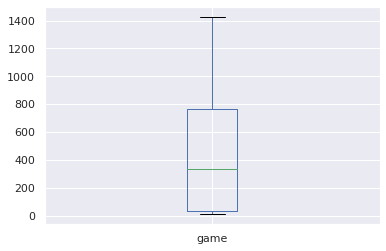

Максимальное нормальное значение количества игр: 1851.0


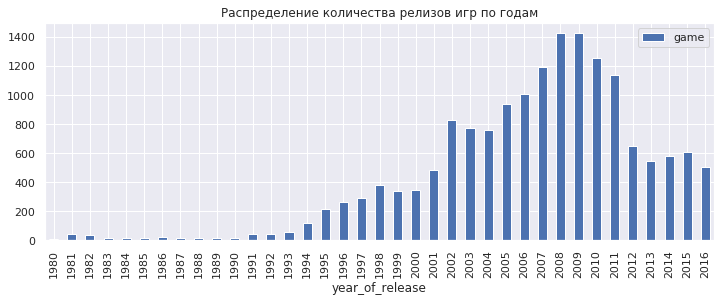

In [11]:
#посмотрим, сколько игр выпускалось за разные годы
data.sort_values(by = 'year_of_release', ascending = True)
game_count_year = data.pivot_table(index = 'year_of_release', values = 'game', aggfunc = 'count').reset_index()
display(game_count_year.head(10))
game_count_year.info()
#построим графики и посмотрим основные параметры распределения
print(game_count_year['game'].describe())
game_count_year.boxplot(column = 'game')
plt.show()
    
Q1 = game_count_year['game'].quantile(0.25)
Q3 = game_count_year['game'].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3+(1.5*IQR)
print('Максимальное нормальное значение количества игр:', maximum)

game_count_year.plot(x ='year_of_release', y ='game', kind = 'bar', legend = True, figsize=(12, 4))
plt.title('Распределение количества релизов игр по годам')
plt.show()

,platform,all_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


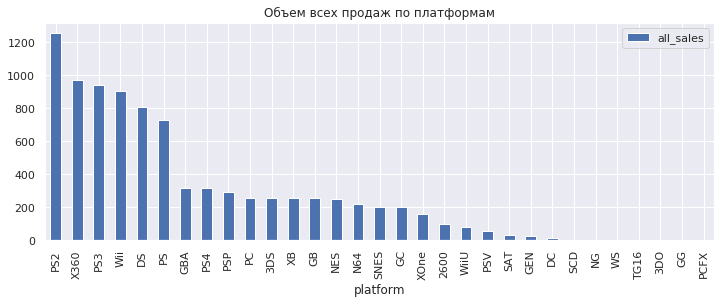

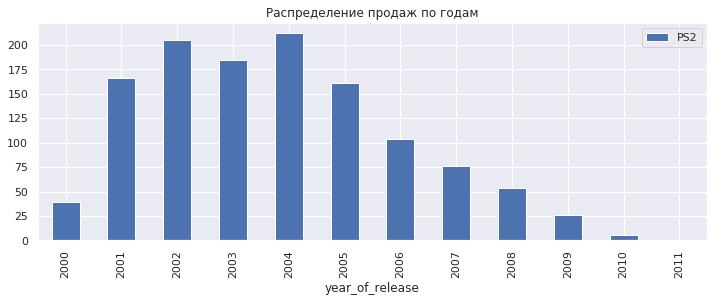

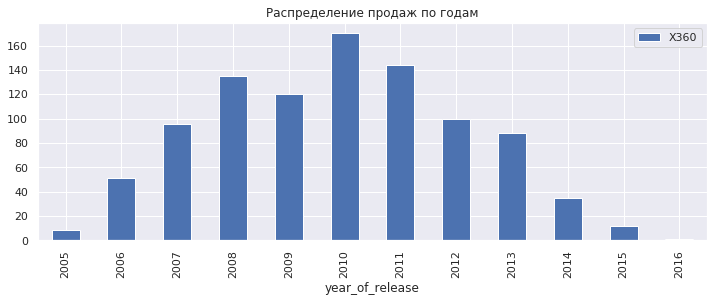

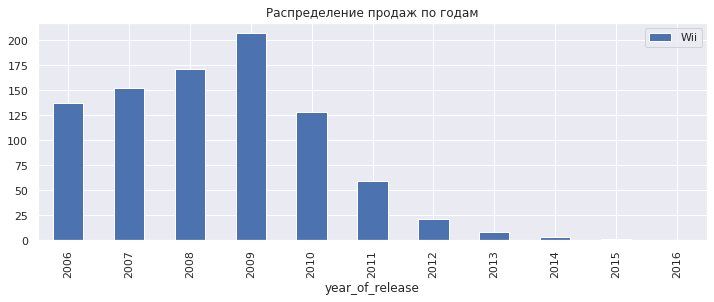

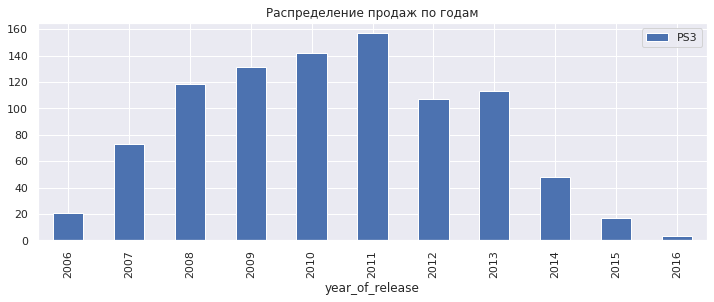

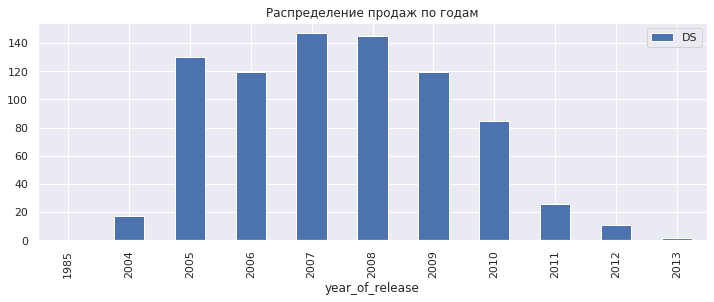

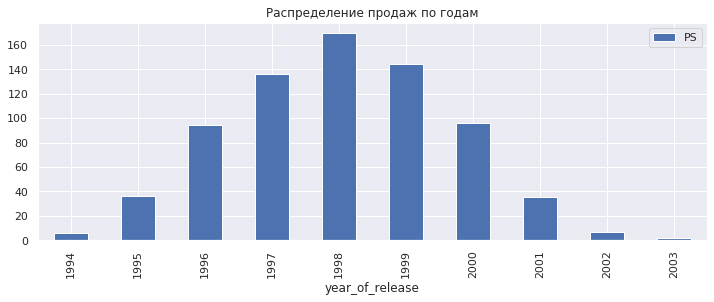

In [12]:
#посмотрим, как менялись продажи по платформам
#построим сводную таблицу по платформам
data.sort_values(by = 'platform', ascending = True)
platform_sales = data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').reset_index()
platform_sales = platform_sales.sort_values(by = 'all_sales', ascending = False)
display(platform_sales)

#платформы с самыми большими продажами
platform_sales.plot(x ='platform', y ='all_sales', kind = 'bar', legend = True, figsize=(12, 4))
plt.title('Объем всех продаж по платформам')
plt.show()

#построим сводную таблицу по годам для 6 самых популярных платформ в цикле, воспользуемся списком:
top6_platform = ["PS2", "X360", "Wii", "PS3", "DS", "PS"]
for platform in top6_platform:
    platform_sales_year = data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum').reset_index()
    platform_sales_year.plot(x = 'year_of_release', y = 'all_sales', kind = 'bar', legend = True, figsize=(12, 4), label = platform)
    plt.title('Распределение продаж по годам')

<div style="border:solid red 2px; padding: 20px">
ОБНОВЛЕНИЕ. Изучим дополнительные параметры
</div>

,platform,min,mean
,,year_of_release,year_of_release
30,XOne,2013,2014.951417
18,PS4,2013,2015.145408
27,WiiU,2012,2013.659864
2,3DS,2011,2013.126953
20,PSV,2011,2014.132867


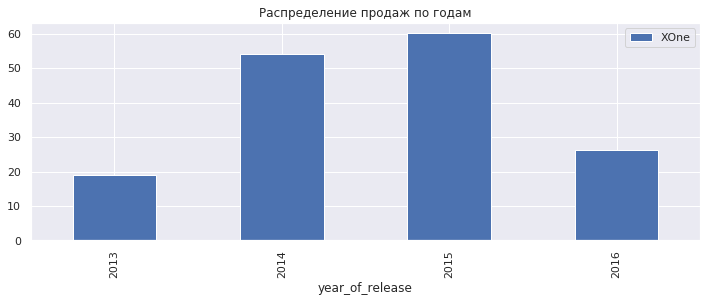

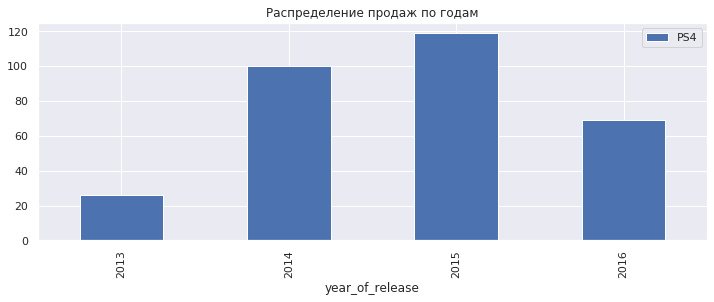

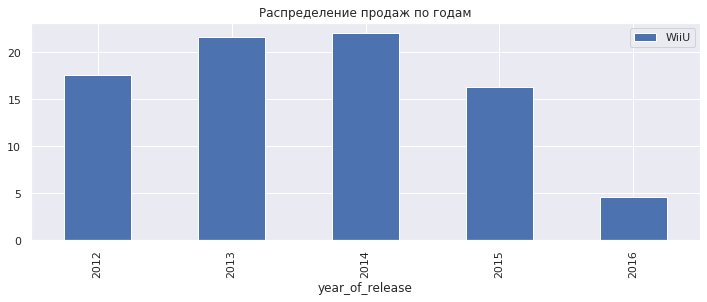

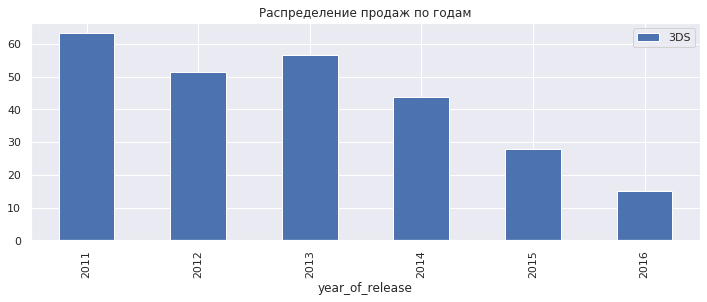

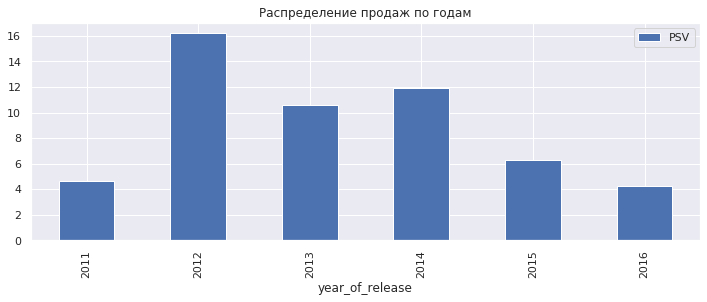

In [13]:
#ИЗУЧИМ НОВИЗНУ ИГР ПО ПЛАТФОРМАМ
data_game_new = data.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'mean']).reset_index()
data_game_new = data_game_new.sort_values(by = ('min','year_of_release'), ascending = False)
display(data_game_new.head())

top5_platform_new = ["XOne", "PS4", "WiiU", "3DS", "PSV"]
for platform in top5_platform_new:
    platform_sales_year = data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum').reset_index()
    platform_sales_year.plot(x = 'year_of_release', y = 'all_sales', kind = 'bar', legend = True, figsize=(12, 4), label = platform)
    plt.title('Распределение продаж по годам')

<div style="border:solid red 2px; padding: 20px">
Код обновлен
</div>

In [14]:
#сделаем срез по периоду для получения данных для анализа
data5 = data.query('2011 <= year_of_release <= 2016')
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 13 columns):
game               4022 non-null object
platform           4022 non-null object
year_of_release    4022 non-null Int64
genre              4022 non-null object
na_sales           4022 non-null float64
eu_sales           4022 non-null float64
jp_sales           4022 non-null float64
other_sales        4022 non-null float64
critic_score       4022 non-null float64
user_score         4022 non-null float64
rating             4022 non-null object
rating_rus         4022 non-null object
all_sales          4022 non-null float64
dtypes: Int64(1), float64(7), object(5)
memory usage: 443.8+ KB


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера</h2>
    
Решая эту задачу, я тоже сначала взяла лет 10. Но потом до меня дошло, что рынок динамичен, все меняется. Некогда популярный жанр за 10 лет может стать не таким популярным. И наоборот. Так что за это время несколько поколений сменятся :) А мы зацепим мертвые платформы и неактуальные предпочтения пользователей. Да и очевидно, что платформа, появившаяся в 2004 году и ставшая очень популярной, набрала больше продаж, чем новенькая консоль, у которой все еще впереди. В таких задачах нам нужна свежная информация, свежая оценка. Если прогнозируем на 2017 год, то какая разница, что было 10 лет назад? Потенциально прибыльные платформы мы можем легко отобрать по графикам и таблице прадаж. Но пользовательские портреты могут поменяться. 
</div>

<div style="border:solid red 2px; padding: 20px">
ОБНОВЛЕНИЕ. Да, действительно. Изучив топ-5 самых новых платформ по минимальной дате выхода игры, можно отметить в целом положительную динамику по продажам, либо ее сохранение на уровне предыдущих лет, учитывая, что за 2016 год у нас неполные данные. Предлагаю взять период 5 лет. 
</div>

,platform,all_sales
4,PS3,445.57
10,X360,380.38
5,PS4,314.14
0,3DS,257.81
11,XOne,159.32
2,PC,97.68
8,Wii,95.02
9,WiiU,82.19
7,PSV,53.81
1,DS,38.73


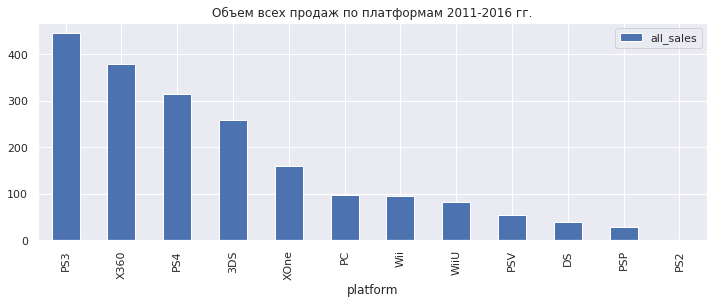

In [15]:
#изучим, какие платформы лидируют по годам:
data5.sort_values(by = 'platform', ascending = True)
platform_sales5 = data5.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').reset_index()
platform_sales5 = platform_sales5.sort_values(by = 'all_sales', ascending = False)
display(platform_sales5)
platform_sales5.plot(x ='platform', y ='all_sales', kind = 'bar', legend = True, figsize=(12, 4))
plt.title('Объем всех продаж по платформам 2011-2016 гг.')
plt.show()

<div style="border:solid red 2px; padding: 20px">
Да, если мы берем продажи за 5 лет, то у нас меняются лидеры. На первые масте выходят свежи платформы, у которых есть потенциал спроса. Ниже код обновлен.
</div>

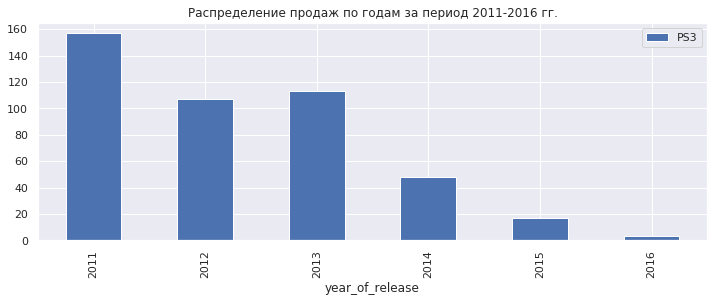

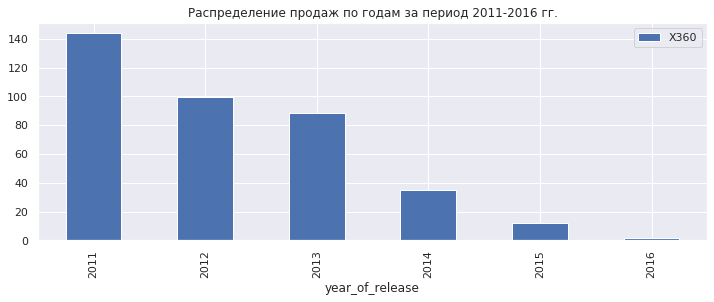

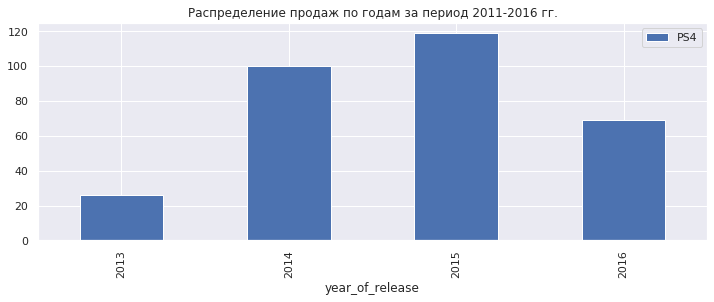

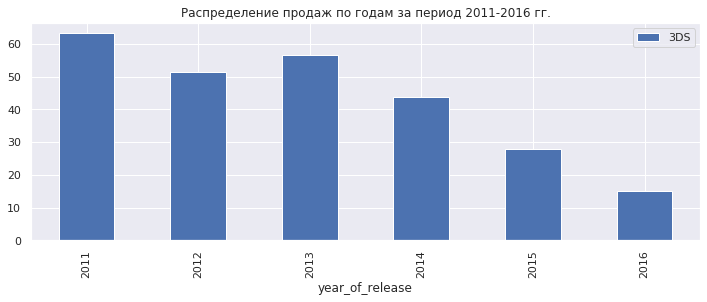

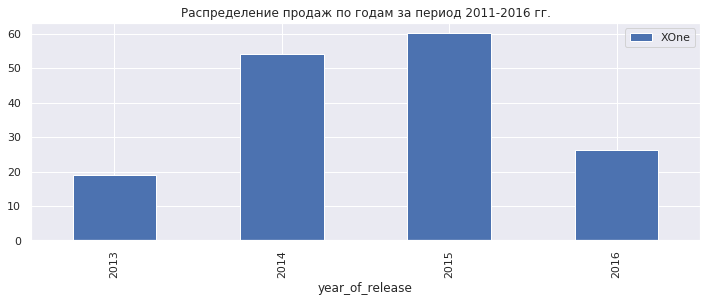

In [16]:
#построим сводную таблицу по годам для 4 самых популярных платформ в цикле, воспользуемся словарем:
top5_platform = ["PS3", "X360", "PS4", "3DS", "XOne"]
for platform in top5_platform:
    platform_sales_year5 = data5[data5['platform'] == platform].pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum').reset_index()
    platform_sales_year5.plot(x = 'year_of_release', y = 'all_sales', kind = 'bar', legend = True, figsize=(12, 4), label = platform)
    plt.title('Распределение продаж по годам за период 2011-2016 гг.')

Text(0.5, 1.0, 'Распределение продаж по годам для PC')

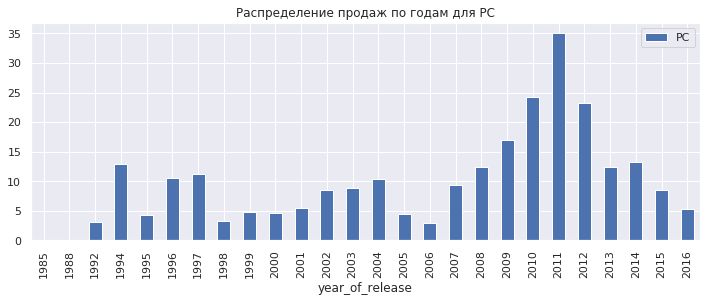

In [17]:
#проверим динамику продаж игр для PC за все годы:
platform_sales_yearPC = data[data['platform'] == "PC"].pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum').reset_index()
platform_sales_yearPC.plot(x = 'year_of_release', y = 'all_sales', kind = 'bar', legend = True, figsize=(12, 4), label = 'PC')
plt.title('Распределение продаж по годам для PC')


<div style="border:solid red 2px; padding: 20px">
КОД ОБНОВЛЕН
</div>

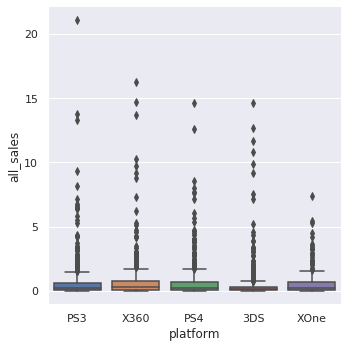

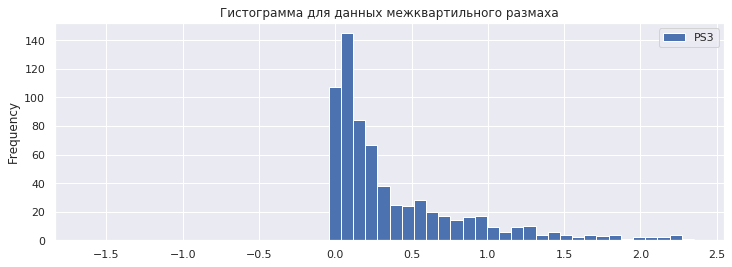

Максимальное нормальное значение для: PS3 1.495


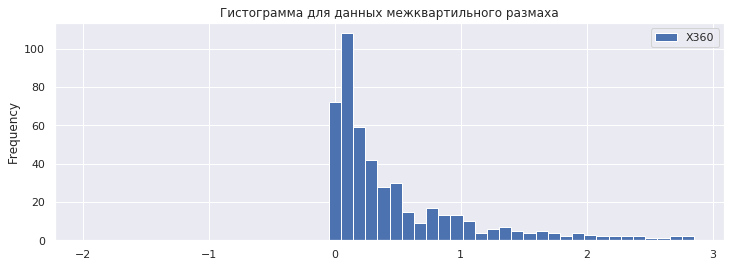

Максимальное нормальное значение для: X360 1.8150000000000002


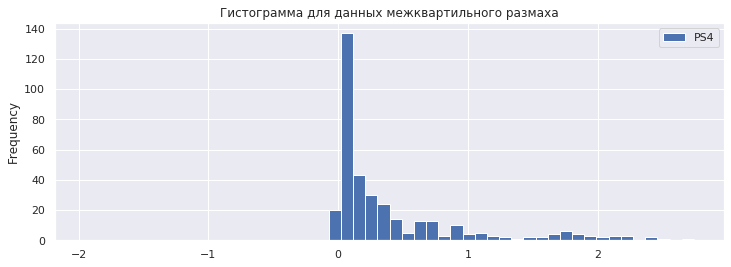

Максимальное нормальное значение для: PS4 1.7349999999999999


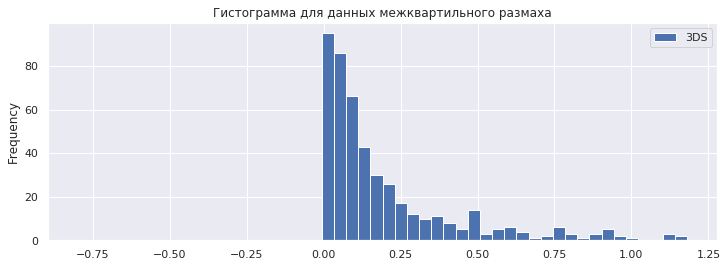

Максимальное нормальное значение для: 3DS 0.7562500000000001


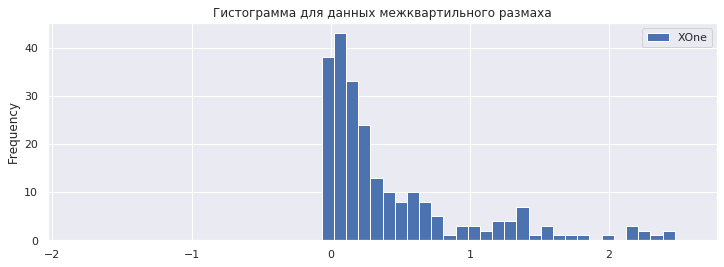

Максимальное нормальное значение для: XOne 1.6225


In [18]:
#построим график "ящик с усами" для глобальных продаж по платформам
data_top5 = data5.query('platform == @top5_platform')
sns.catplot(x='platform', y='all_sales', kind="box", data=data_top5)
#обнаружены большое количество выбросов
#построим гистограмму для данных межквартильного размаха
for platform in top5_platform:
    Q1 = data5[data5['platform'] == platform]['all_sales'].quantile(0.25)
    Q3 = data5[data5['platform'] == platform]['all_sales'].quantile(0.75)
    IQR = Q3 - Q1
    data5[data5['platform'] == platform].plot(y='all_sales', kind='hist', bins=50, figsize=(12, 4), grid=True, range = ((Q1-3*IQR), (Q3+3*IQR)), label = platform)
    plt.title('Гистограмма для данных межквартильного размаха')
    plt.show()
    maximum = Q3+(1.5*IQR)
    print('Максимальное нормальное значение для:', platform, maximum)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Отлично. Не забывай про **ylim**.</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
- Изобрази один график с несколькими ящиками: по одному на платформу. Так мы сможем их сравнить.
- Какой жизненный цикл платформ?
</div>

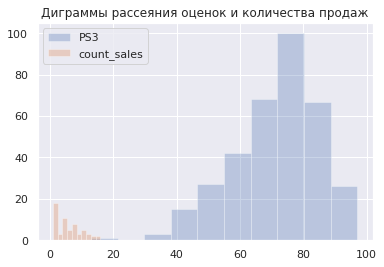

Корреляция между critic_score и количеством продаж в PS3 составляет 0.36246336973387905


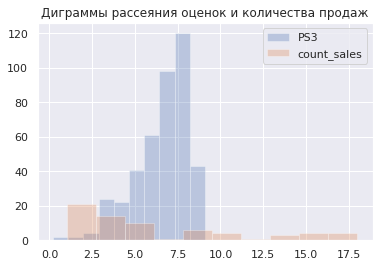

Корреляция между user_score и количеством продаж в PS3 составляет 0.5978182081145892


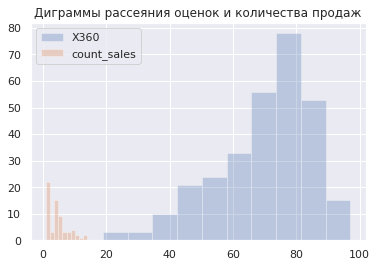

Корреляция между critic_score и количеством продаж в X360 составляет 0.42231588976663464


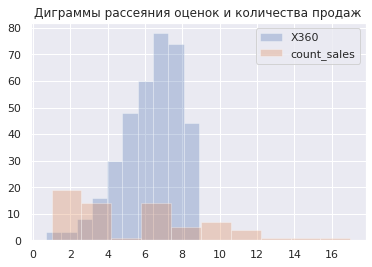

Корреляция между user_score и количеством продаж в X360 составляет 0.5830368919791681


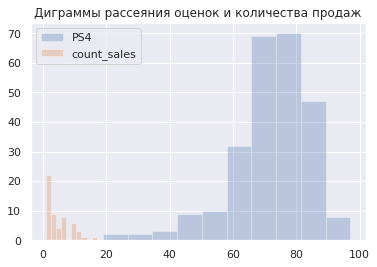

Корреляция между critic_score и количеством продаж в PS4 составляет 0.4821827857910021


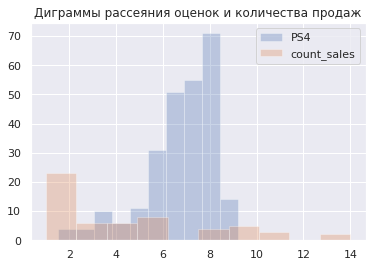

Корреляция между user_score и количеством продаж в PS4 составляет 0.5765266355011779


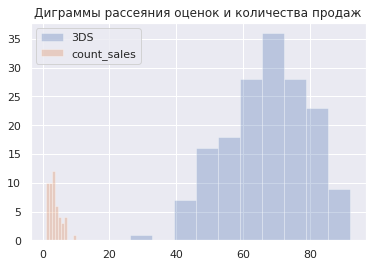

Корреляция между critic_score и количеством продаж в 3DS составляет 0.18145991005428128


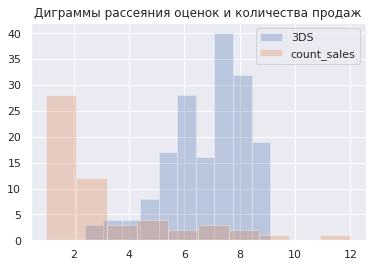

Корреляция между user_score и количеством продаж в 3DS составляет 0.4078143440503598


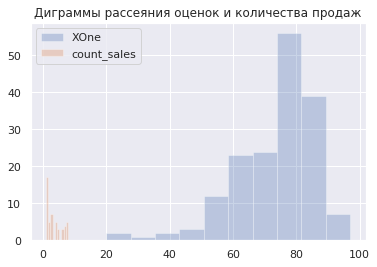

Корреляция между critic_score и количеством продаж в XOne составляет 0.4954522078086925


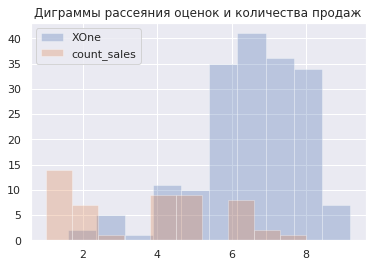

Корреляция между user_score и количеством продаж в XOne составляет 0.24381321647925708


In [19]:
#посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
for platform in top5_platform:
    data_top5 = data5[data5['platform'] == platform]
    for column in ['critic_score', 'user_score']:
        ax = plt.hist(data_top5[data_top5[column] != -1][column], alpha = 0.3, label = platform)
        count_sales = data_top5[data_top5[column] != -1].pivot_table(index = column, values = 'all_sales', aggfunc = 'count').reset_index()
        plt.hist(count_sales['all_sales'], alpha = 0.3, label = 'count_sales')
        plt.legend()
        plt.title('Диграммы рассеяния оценок и количества продаж')
        plt.show()
        #оценим корреляцию
        print('Корреляция между', column, 'и количеством продаж в', platform, 'составляет', count_sales[column].corr(count_sales['all_sales']))

   

<div style="border:solid red 2px; padding: 20px">
ДОПОЛНИТЕЛЬНЫЙ РАСЧЕТ.
Я посчитал средний жизненный цикл платформы через медианные продажи за все годы. Мы фильтруем продажи за каждый год относительно медианных и, если продажи ниже, то не берем эти годы в расчет. Таким образом у нас жизненный цикл в среднем получился 7,67, а медианный 7 лет. 
</div>

In [20]:
#изучим жизненный цикл платформ
data_sales_year = data.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'median').reset_index()
data_sales_year.head()
platforms = data['platform'].unique()
for platform in platforms:
    sales_for_year = data[data['platform'] == platform]['all_sales'].median()
data_sales_year_life = data_sales_year.query('all_sales >= @sales_for_year')
data_lifecicle = data_sales_year.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'count')
print('Средний жизненный цикл платформы - ', data_lifecicle['year_of_release'].mean())
print('Медианный жизненный цикл платформы - ', data_lifecicle['year_of_release'].median())

Средний жизненный цикл платформы -  7.67741935483871
Медианный жизненный цикл платформы -  7.0


,genre,all_sales,game
0,Action,557.80,1269
7,Role-Playing,245.63,465
1,Adventure,45.04,410
10,Sports,237.15,389
3,Misc,139.42,375


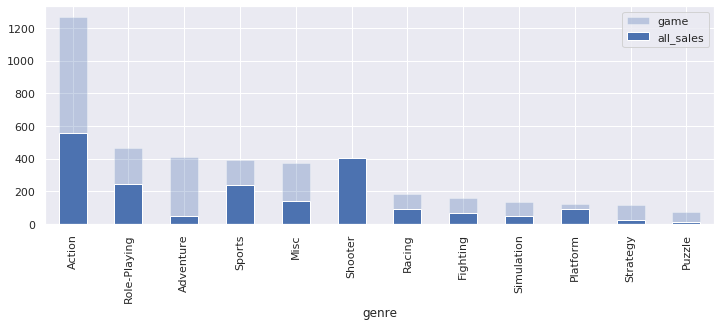

Корреляция между количеством игр в жанре и объемом продаж 0.8430927354307608


In [21]:
#посмотрим на общее распределение игр по жанрам
data_genre5 = data5.pivot_table(index = 'genre', values = ['game', 'all_sales'], aggfunc = {'game': 'count', 'all_sales': 'sum'}).reset_index()
data_genre5 = data_genre5.sort_values(by = 'game', ascending = False)
display(data_genre5.head())
ax = data_genre5.plot(x = 'genre', y = 'game', kind = 'bar', figsize=(12, 4), grid=True, alpha = 0.3)
data_genre5.plot(x = 'genre', y = 'all_sales', kind = 'bar', figsize=(12, 4), grid=True, ax = ax)
plt.show()

print('Корреляция между количеством игр в жанре и объемом продаж', data_genre5['all_sales'].corr(data_genre5['game']))

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px">
<b> Комментарий ревьюера</b>
    
Хорошо. А может ли быть такая ситуация, что экшн делает продажи только за счет большего количества игр и большого количества бестселлеров (это можно видеть по боксплоту)? Быть может, другие жанры имеют больше продаж в расчете на единицу игры. Сделай то же самое, но с медианными продажами.
</div>

<div style="border:solid red 2px; padding: 20px">
Да, такое может быть. Поэтому я рассчитал дополнительно корреляцию между количеством игр в жанре и объемом продаж. Она достаточно высокая. Ниже, по твоей рекомендации я расчитал для медианных значений по продажам и данные действительно изменились. 
</div>

,genre,all_sales,game
8,Shooter,0.410,329
10,Sports,0.200,389
4,Platform,0.185,122
2,Fighting,0.180,159
6,Racing,0.160,180


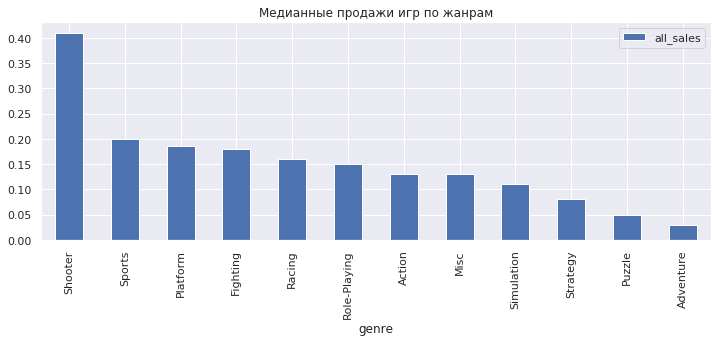

Корреляция между количеством игр в жанре и объемом продаж 0.023043948114752046


In [22]:
#посмотрим на общее распределение игр по жанрам и соотнесем с медианными продажами
data_genre5 = data5.pivot_table(index = 'genre', values = ['game', 'all_sales'], aggfunc = {'game': 'count', 'all_sales': 'median'}).reset_index()
data_genre5 = data_genre5.sort_values(by = 'all_sales', ascending = False)
display(data_genre5.head())
data_genre5.plot(x = 'genre', y = 'all_sales', kind = 'bar', figsize=(12, 4), grid=True)
plt.title('Медианные продажи игр по жанрам')
plt.show()

print('Корреляция между количеством игр в жанре и объемом продаж', data_genre5['all_sales'].corr(data_genre5['game']))

**Вывод (ОБНОВЛЕН)**

Проведен исследовательский анализ данных, можно сделать следующие выводы:
1. С 1980 по 1993 года включительно отмечаютсчя незначительные продажи. Сильный рост начинается с 1994 года. Пик продаж приходится на 2008 и 2009 годы, после чего начинается спад. Причинами роста продаж с 1994 года могут быть: открытие новых потребительских рынков, повышение спроса за счет, с одной стороны роста покупательской способности и привлекательности самих игр, с другой - с удешевлением производства как самого оборудования, так и разрабатываемых игр. Спад с 2010 года может быть связан с массовой доступностью компьютеров, а также высокого предложения  мобильных решений: смартфонов и планшетных компьютеров. На данном этапе определим в качестве важного периода: 1994-2016 гг. 
2. Выявлены шесть платформ, лидирующих по объему продаж: PS2, X360, Wii, PS3, DS, PS. Во всех случаях наблюдаются снижения продаж по платформам к концу оцениваемого периода.
3. **Однако мы оцениваем всю выборку платформ, в т.ч. старые, для которых игры уже могут не производиться и они могут быть не востребованными у пользователей. Интерес представляют новые платформы, так как они могли только появиться и в будущем будут иметь популярность среди игроков. Если взять отсечку по новизне игр, то лидерами по спросу становятся игры для "PS3", "X360", "PS4", "3DS", "XOne". Самые ранние игры по эттой выборке появились в 2011 году, поэтому в качестве актуального периода исследования возьмем 5 лет - с 2011 до 2016 гг.**
4. **После оценки динамики продаж лидирующих платформ можно отметить незначительное падение продаж. Есть небльшая просадка в 2016 году, но это может быть связано с неполнотой данных за этот период, так как нам не известно, когда был сформирован датасет. Как было отмечено выше, снижение продаж может быть связано, также, с повышенем доступности и распространением компьютеров и мобильных устройств.**
5. **При постройке диаграммы размаха для глобальных продаж по платформам обнаружены сильные выбросы у всех платформ. Дополнительно изучены границы нормальных значений и установлено максимальное нормальное значение для каждой платформы: для PS3 1.495 млн. копий, X360 1.815 млн. копий, для PS4 1.735 млн. копий, для 3DS 0.756 млн. копий, для XOne 1.6225 млн. копий. Все, что выше этих значений, является выбросами**.
6. Оценена взаимосвязь между оценками критиков и пользователей с объемом продаж игр на 6 популярных платформах. Можно сделать вывод, что такая взаимосвязь существует.Более высокая корреляция отмечена с оценками пользователей, это может быть связано с более высоким доверием покупаетелей игр личному опыту других игроков, нежели критиков. При оценке мы не стали удалять выбросы, так как эти продажи тоже чем-то обусловлены. Например, это может быть мода, популярность игры, ее реклама, любые факторы, которые влияют на поведение потребителей. Поэтому считаю, что эти данные в этом случае важны. 
7. При оценке распределения игр по жанрам удалось установить, что больше всего игр в жанре Action, на втором месте Sports и Misk, на третьем Adventure и Role-playing. Самыми прибыльными играми являются игры самого популярного жанра Action и Sports. При этом спортивные игры не являются самыми популярными, а скорее нишевые, рассчитанные на определенных игроков. Приключенческие игры (Adventure) являются достаточно распространенными, но не пользуются популярностью. Непопулярными также являются файтинги (Fighting) и стратегии (Strategy). Эти игры также являются нишевыми и интрересными только для определенных групп пользователей. В целом можно отметить взаимосвязь между количеством игр в жанре и их популярностью на рынке, корреляция составялет 0,85.
**Однако, при детально изучении продаж по жанрам и оценке их медианных значений и определении количества продаж на 1 единицу игры, самыми популярными жанрами являются шутеры, затем с отрывом в 2 раза идут спортивные игры, платформе и файтинги.**
8. **Определен жизненный цикл платформы, в среднем он составлет 7 лет.**

### Составьте портрет пользователя каждого региона

<div style="border:solid red 2px; padding: 20px">
Код обновлен. Добавлены продаж по другим рынкам other_sales
</div>

,platform,na_sales
10,X360,226.80
4,PS3,168.26
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65


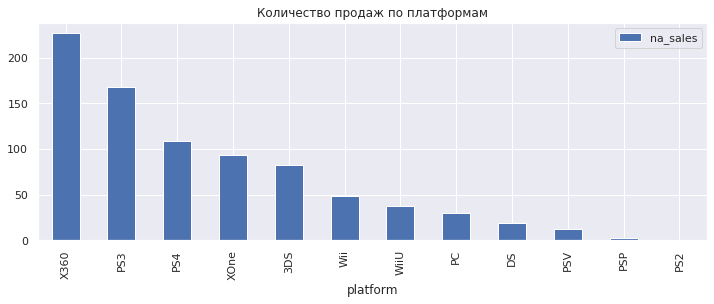

,platform,eu_sales
4,PS3,163.10
5,PS4,141.09
10,X360,117.10
0,3DS,61.27
2,PC,56.70


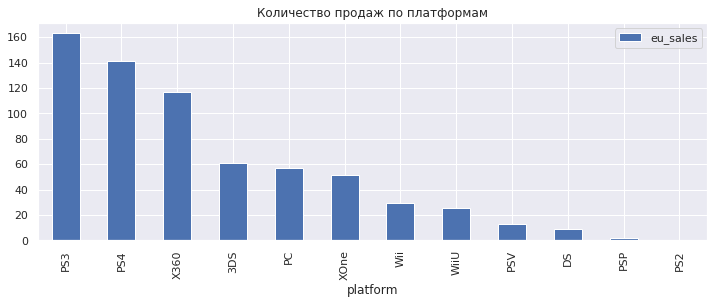

,platform,jp_sales
0,3DS,100.62
4,PS3,49.39
6,PSP,24.04
7,PSV,21.84
5,PS4,15.96


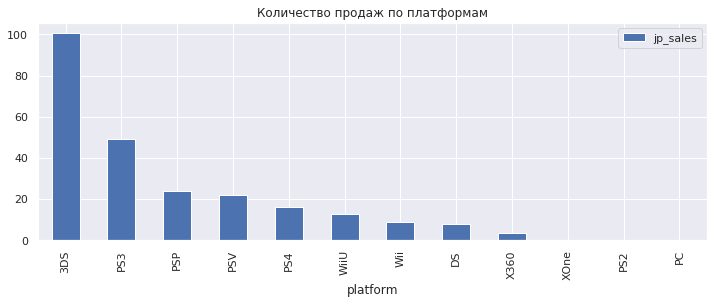

,platform,other_sales
4,PS3,64.82
5,PS4,48.35
10,X360,33.13
11,XOne,14.27
0,3DS,13.27


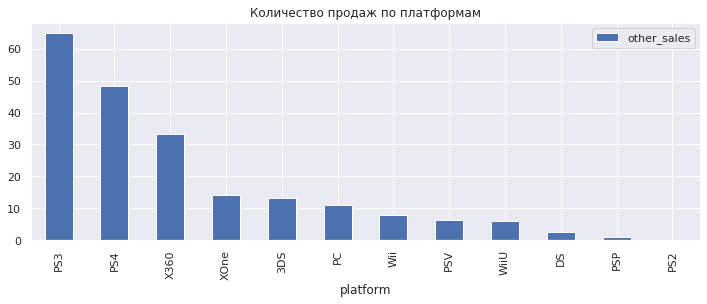

,platform,eu_sales,jp_sales,na_sales,other_sales
10,X360,117.10,3.35,226.80,33.13
4,PS3,163.10,49.39,168.26,64.82
5,PS4,141.09,15.96,108.74,48.35
11,XOne,51.59,0.34,93.12,14.27
0,3DS,61.27,100.62,82.65,13.27


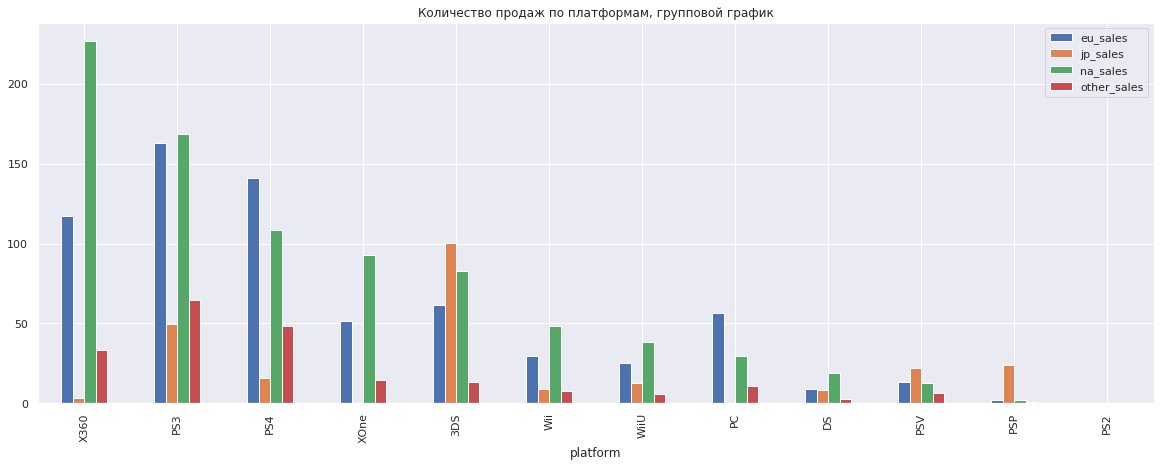

In [23]:
#определим для пользователя каждого региона (NA, EU, JP, other):
#Самые популярные платформы (топ-5). Исследуем различия в долях продаж.
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data_platform5 = data5.pivot_table(index = 'platform', values = column, aggfunc = 'sum').reset_index()
    data_platform5 = data_platform5.sort_values(by = column, ascending = False)
    display(data_platform5.head())
    data_platform5.plot(x = 'platform', y = column, kind = 'bar', figsize=(12, 4), grid=True)
    plt.title('Количество продаж по платформам')
    plt.show()
#построим групповой график по популярности жанров:
data_platform5 = data5.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum').reset_index()
data_platform5 = data_platform5.sort_values(by = 'na_sales', ascending = False)
display(data_platform5.head())
data_platform5.plot(x = 'platform', kind='bar', figsize=(20, 7), grid=True)
plt.title('Количество продаж по платформам, групповой график')
plt.show()

<div style="border:solid red 2px; padding: 20px">
Дополнительные расчет по медианным продажам
</div>

,platform,na_sales
10,X360,0.15
11,XOne,0.12
9,WiiU,0.11
8,Wii,0.08
4,PS3,0.06


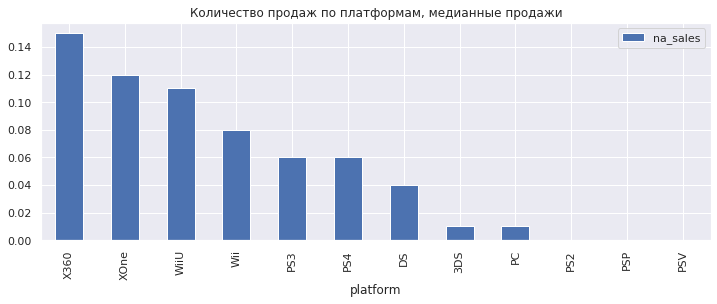

,platform,eu_sales
5,PS4,0.08
10,X360,0.08
9,WiiU,0.07
11,XOne,0.07
2,PC,0.05


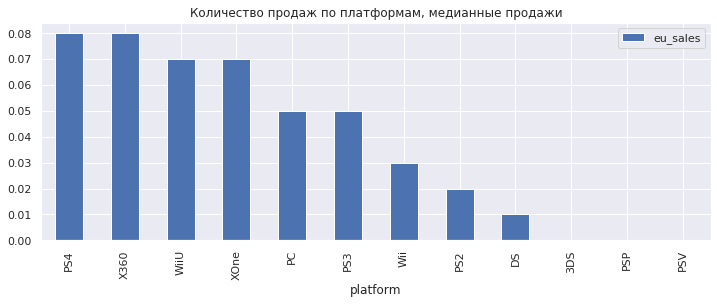

,platform,jp_sales
0,3DS,0.05
6,PSP,0.04
7,PSV,0.03
4,PS3,0.02
5,PS4,0.01


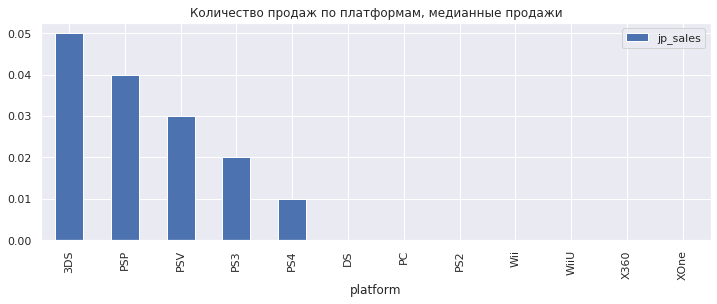

,platform,other_sales
5,PS4,0.03
4,PS3,0.02
9,WiiU,0.02
10,X360,0.02
11,XOne,0.02


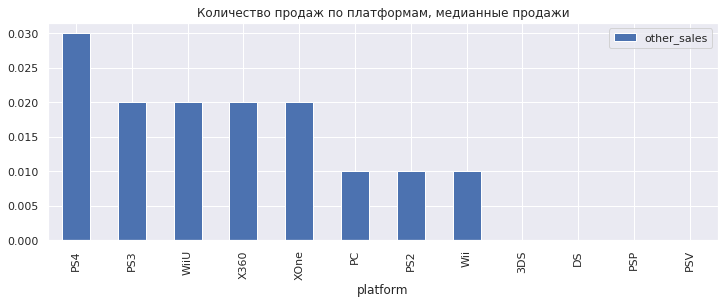

,platform,eu_sales,jp_sales,na_sales,other_sales
10,X360,0.08,0.00,0.15,0.02
11,XOne,0.07,0.00,0.12,0.02
9,WiiU,0.07,0.00,0.11,0.02
8,Wii,0.03,0.00,0.08,0.01
4,PS3,0.05,0.02,0.06,0.02


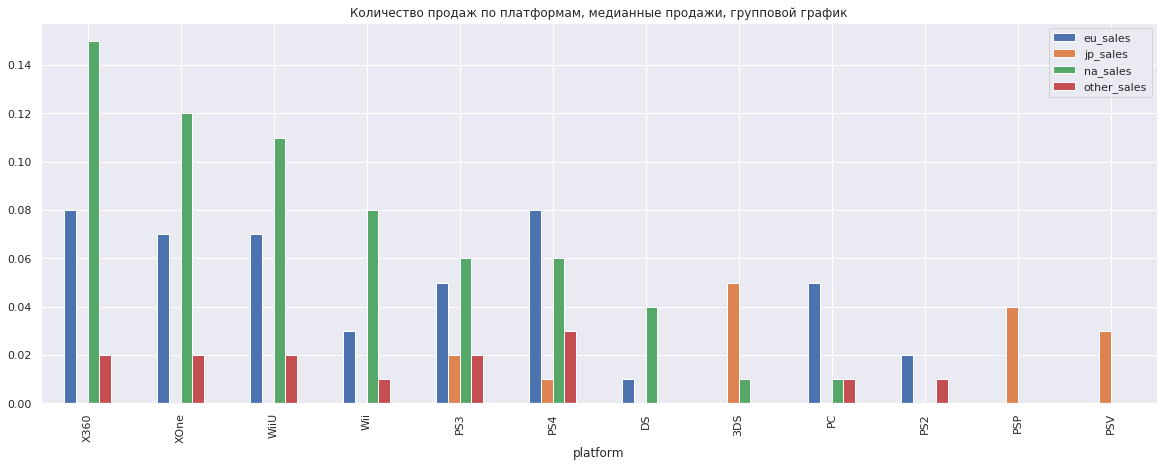

In [24]:
#определим для пользователя каждого региона (NA, EU, JP, other) по медианным продажам:
#Самые популярные платформы (топ-5). Исследуем различия в долях продаж.
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data_platform5 = data5.pivot_table(index = 'platform', values = column, aggfunc = 'median').reset_index()
    data_platform5 = data_platform5.sort_values(by = column, ascending = False)
    display(data_platform5.head())
    data_platform5.plot(x = 'platform', y = column, kind = 'bar', figsize=(12, 4), grid=True)
    plt.title('Количество продаж по платформам, медианные продажи')
    plt.show()
#построим групповой график по популярности жанров:
data_platform5 = data5.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'median').reset_index()
data_platform5 = data_platform5.sort_values(by = 'na_sales', ascending = False)
display(data_platform5.head())
data_platform5.plot(x = 'platform', kind='bar', figsize=(20, 7), grid=True)
plt.title('Количество продаж по платформам, медианные продажи, групповой график')
plt.show()

,genre,na_sales
0,Action,230.92
8,Shooter,194.43
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.69


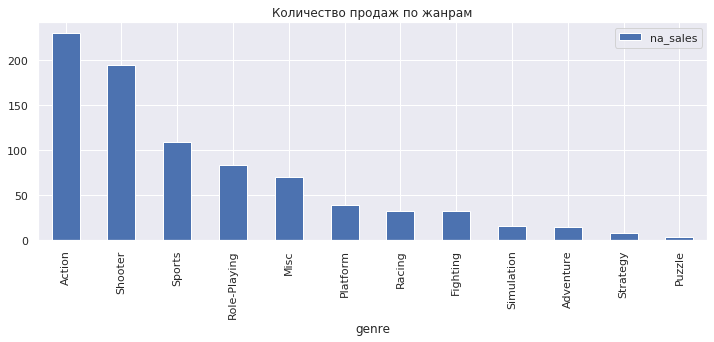

,genre,eu_sales
0,Action,199.12
8,Shooter,148.02
10,Sports,88.48
7,Role-Playing,62.30
6,Racing,40.58


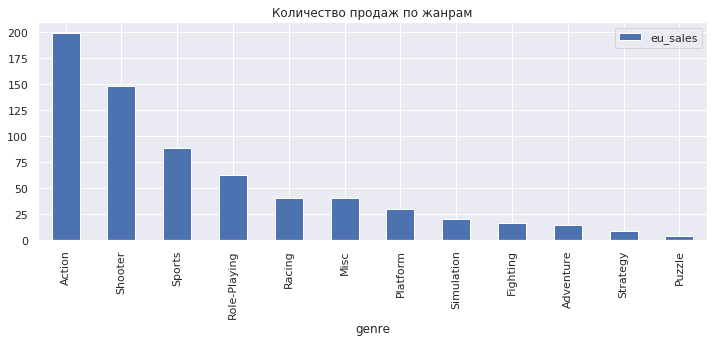

,genre,jp_sales
7,Role-Playing,79.87
0,Action,63.62
3,Misc,17.60
2,Fighting,12.38
4,Platform,12.13


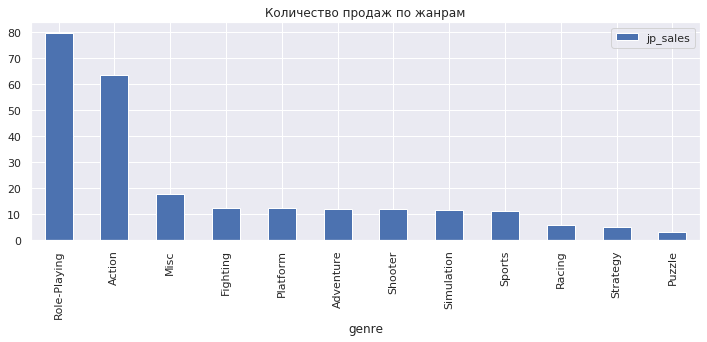

,genre,other_sales
0,Action,64.14
8,Shooter,48.54
10,Sports,28.88
7,Role-Playing,19.68
3,Misc,12.41


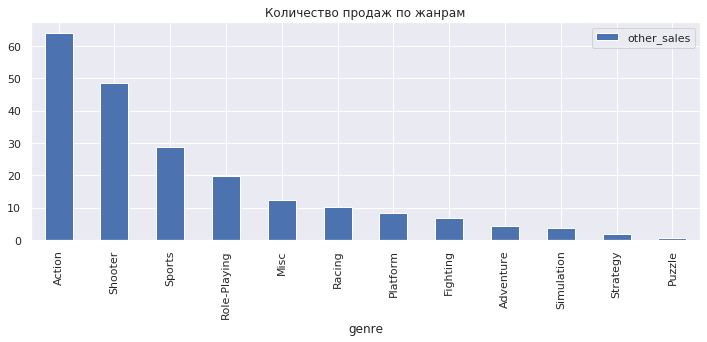

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,199.12,63.62,230.92,64.14
1,Adventure,13.96,12.07,14.76,4.25
2,Fighting,16.24,12.38,31.63,6.65
3,Misc,39.72,17.60,69.69,12.41
4,Platform,30.07,12.13,38.28,8.20


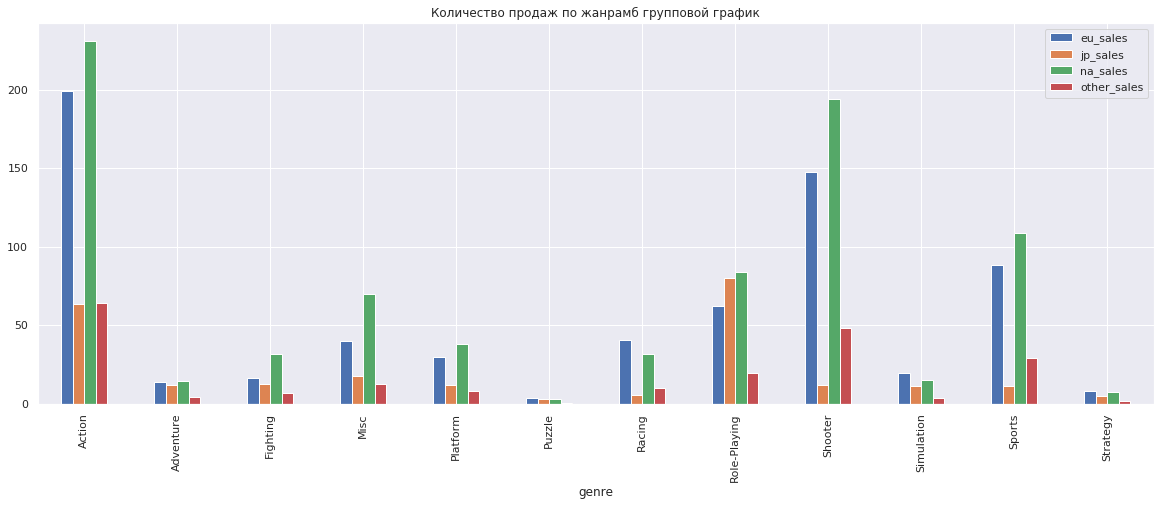

In [25]:
#Исследуем самые популярные жанры (топ-5).
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data_genre5 = data5.pivot_table(index = 'genre', values = column, aggfunc = 'sum').reset_index()
    data_genre5 = data_genre5.sort_values(by = column, ascending = False)
    display(data_genre5.head())
    data_genre5.plot(x = 'genre', y = column, kind = 'bar', figsize=(12, 4), grid=True)
    plt.title('Количество продаж по жанрам')
    plt.show()
#построим групповой график по популярности жанров:
data_genre5 = data5.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum').reset_index()
display(data_genre5.head())
data_genre5.plot(x = 'genre', kind='bar', figsize=(20, 7), grid=True)
plt.title('Количество продаж по жанрамб групповой график')
plt.show()

<div style="border:solid red 2px; padding: 20px">
Дополнительный код. Проверим популярные жанры по медианным продажам
</div>

,genre,na_sales
8,Shooter,0.18
4,Platform,0.09
10,Sports,0.08
2,Fighting,0.06
6,Racing,0.06


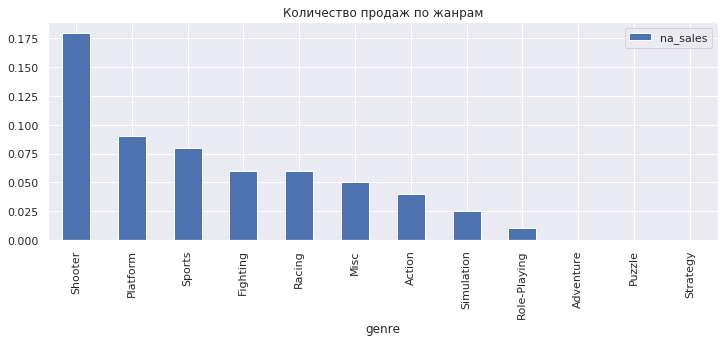

,genre,eu_sales
8,Shooter,0.15
4,Platform,0.07
6,Racing,0.07
10,Sports,0.05
2,Fighting,0.04


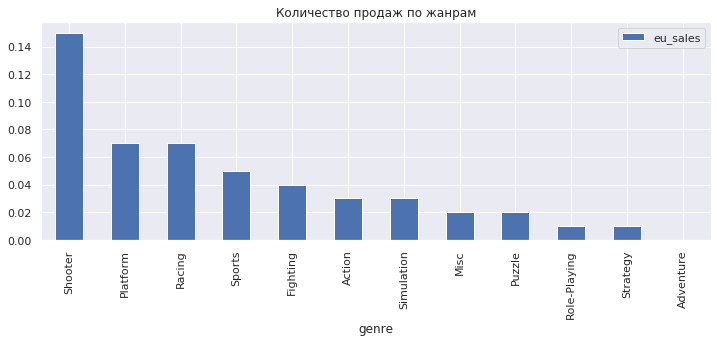

,genre,jp_sales
7,Role-Playing,0.06
2,Fighting,0.03
1,Adventure,0.02
0,Action,0.01
3,Misc,0.00


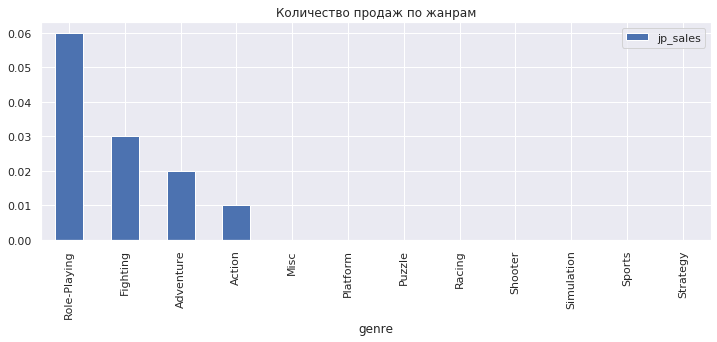

,genre,other_sales
8,Shooter,0.05
4,Platform,0.02
6,Racing,0.02
10,Sports,0.02
0,Action,0.01


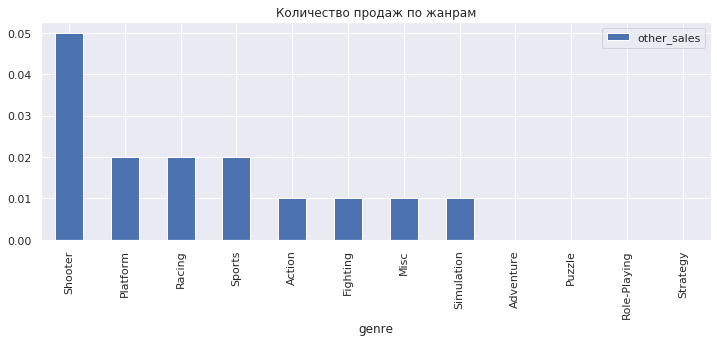

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.03,0.01,0.04,0.01
1,Adventure,0.00,0.02,0.00,0.00
2,Fighting,0.04,0.03,0.06,0.01
3,Misc,0.02,0.00,0.05,0.01
4,Platform,0.07,0.00,0.09,0.02


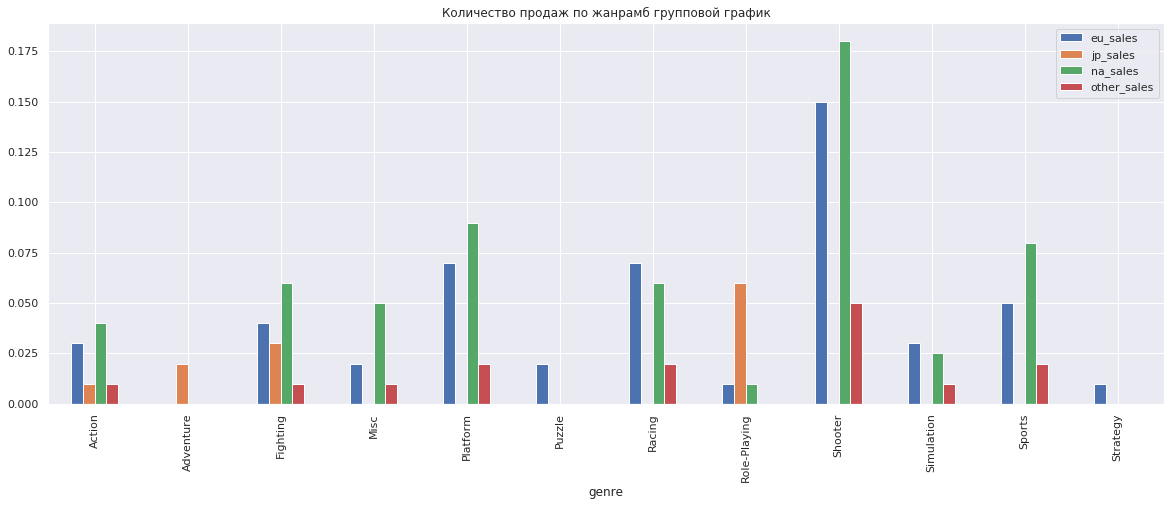

In [26]:
#проверим популярные жанры по медианным продажам
#Исследуем самые популярные жанры (топ-5).
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data_genre5 = data5.pivot_table(index = 'genre', values = column, aggfunc = 'median').reset_index()
    data_genre5 = data_genre5.sort_values(by = column, ascending = False)
    display(data_genre5.head())
    data_genre5.plot(x = 'genre', y = column, kind = 'bar', figsize=(12, 4), grid=True)
    plt.title('Количество продаж по жанрам')
    plt.show()
#построим групповой график по популярности жанров:
data_genre5 = data5.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'median').reset_index()
display(data_genre5.head())
data_genre5.plot(x = 'genre', kind='bar', figsize=(20, 7), grid=True)
plt.title('Количество продаж по жанрамб групповой график')
plt.show()

<div style="border:solid red 2px; padding: 20px">
Код обновлен, добавлены другие продажи и сделан пересчет для игр с отсутствующим рейтингом
</div>

,rating_rus,na_sales
5,больше 17 лет,308.45
1,Для всех,170.17
3,Нет рейтинга,123.69
4,больше 10 лет,117.72
0,13-19 лет,109.31


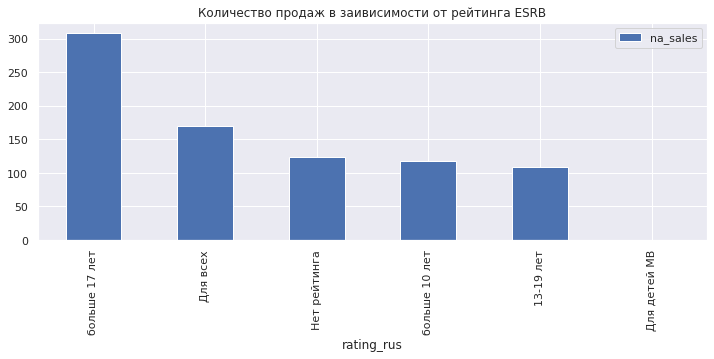

,rating_rus,eu_sales
5,больше 17 лет,250.26
1,Для всех,141.73
3,Нет рейтинга,116.64
0,13-19 лет,83.16
4,больше 10 лет,78.00


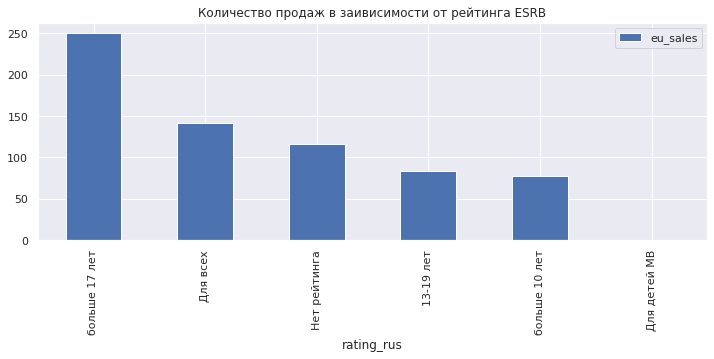

,rating_rus,jp_sales
3,Нет рейтинга,138.21
1,Для всех,36.68
0,13-19 лет,33.39
5,больше 17 лет,26.14
4,больше 10 лет,11.23


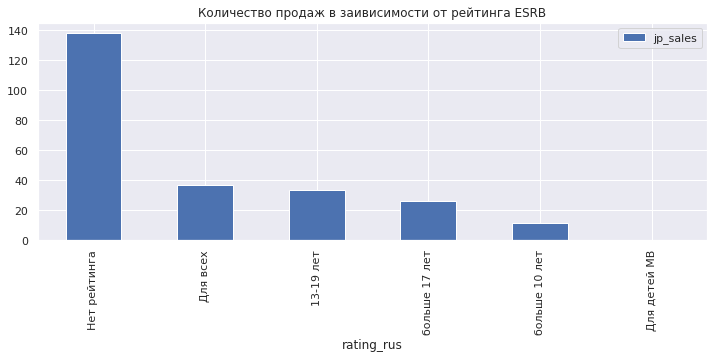

,rating_rus,other_sales
5,больше 17 лет,81.96
1,Для всех,40.86
3,Нет рейтинга,33.98
0,13-19 лет,28.17
4,больше 10 лет,23.91


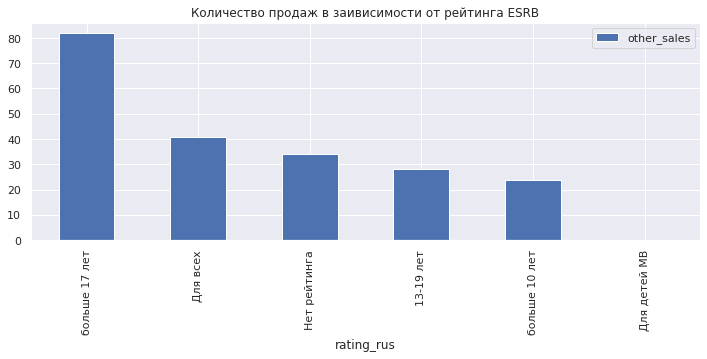

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.03,0.01,0.04,0.01
1,Adventure,0.00,0.02,0.00,0.00
2,Fighting,0.04,0.03,0.06,0.01
3,Misc,0.02,0.00,0.05,0.01
4,Platform,0.07,0.00,0.09,0.02


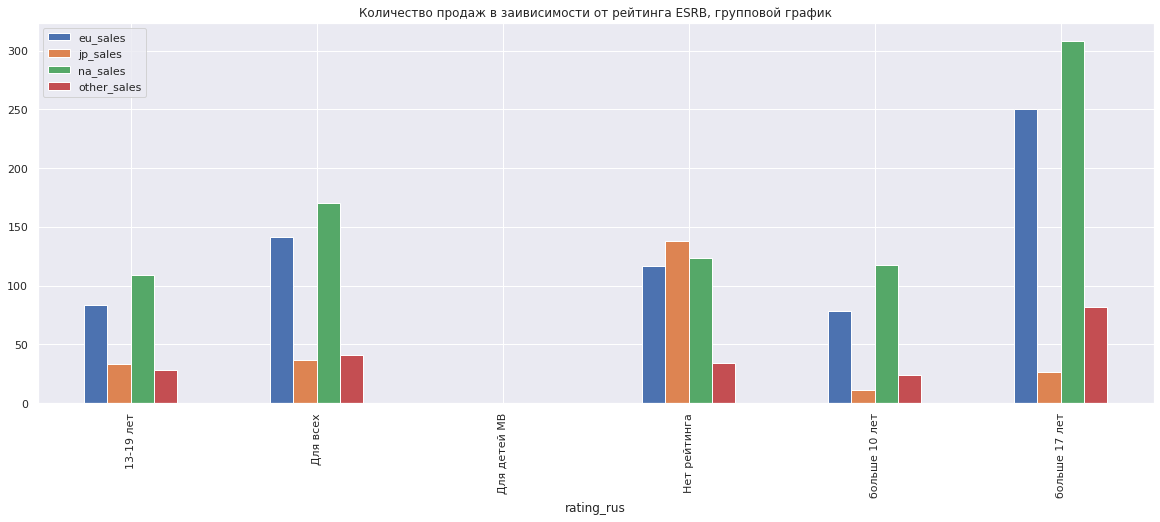

In [27]:
#Исследование влияния рейтинга ESRB на продажи в отдельном регионе
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data_rating5 = data5.pivot_table(index = 'rating_rus', values = column, aggfunc = 'sum').reset_index()
    data_rating5 = data_rating5.sort_values(by = column, ascending = False)
    display(data_rating5.head())
    data_rating5.plot(x = 'rating_rus', y = column, kind = 'bar', figsize=(12, 4), grid=True)
    plt.title('Количество продаж в заивисимости от рейтинга ESRB')
    plt.show()
#построим групповой график по популярности жанров:
data_rating5 = data5.pivot_table(index = 'rating_rus', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum').reset_index()
display(data_genre5.head())
data_rating5.plot(x = 'rating_rus', kind='bar', figsize=(20, 7), grid=True)
plt.title('Количество продаж в заивисимости от рейтинга ESRB, групповой график')
plt.show()

<div style="border:solid red 2px; padding: 20px">
Дополнительный расчет для медианных значений
</div>

,rating_rus,na_sales
2,Для детей МВ,0.42
5,больше 17 лет,0.16
4,больше 10 лет,0.12
1,Для всех,0.08
0,13-19 лет,0.07


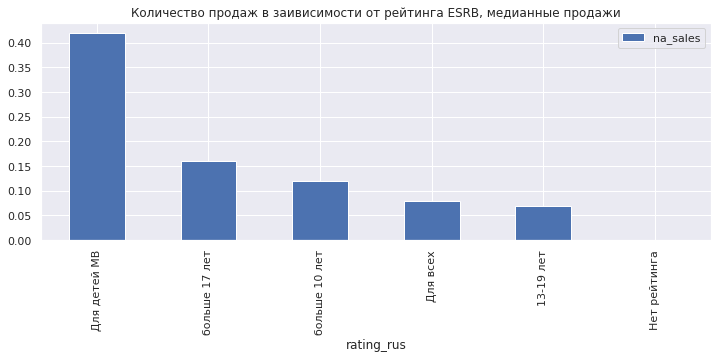

,rating_rus,eu_sales
5,больше 17 лет,0.14
4,больше 10 лет,0.09
1,Для всех,0.05
0,13-19 лет,0.04
2,Для детей МВ,0.00


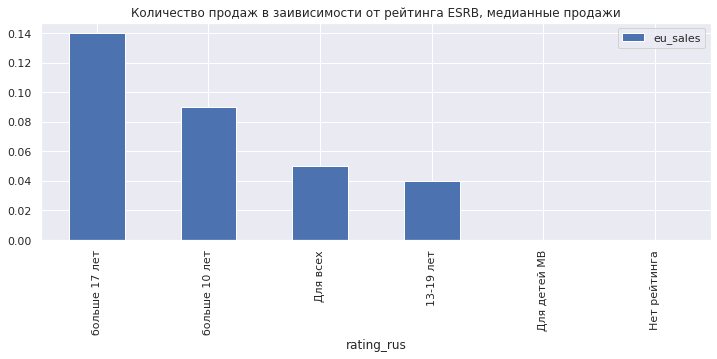

,rating_rus,jp_sales
3,Нет рейтинга,0.02
0,13-19 лет,0.00
1,Для всех,0.00
2,Для детей МВ,0.00
4,больше 10 лет,0.00


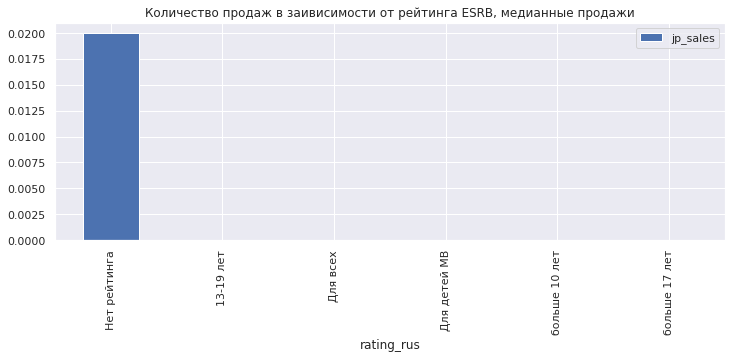

,rating_rus,other_sales
5,больше 17 лет,0.040
2,Для детей МВ,0.030
4,больше 10 лет,0.030
1,Для всех,0.020
0,13-19 лет,0.015


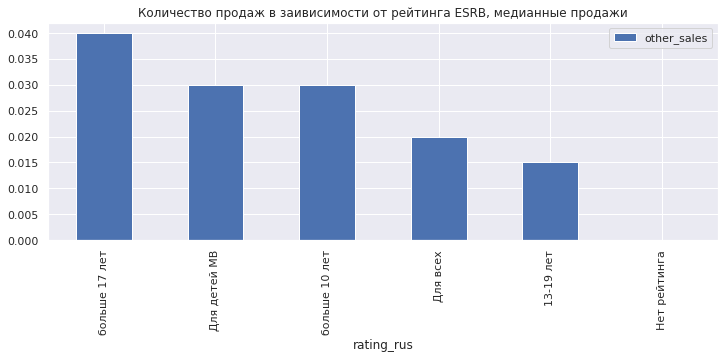

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.03,0.01,0.04,0.01
1,Adventure,0.00,0.02,0.00,0.00
2,Fighting,0.04,0.03,0.06,0.01
3,Misc,0.02,0.00,0.05,0.01
4,Platform,0.07,0.00,0.09,0.02


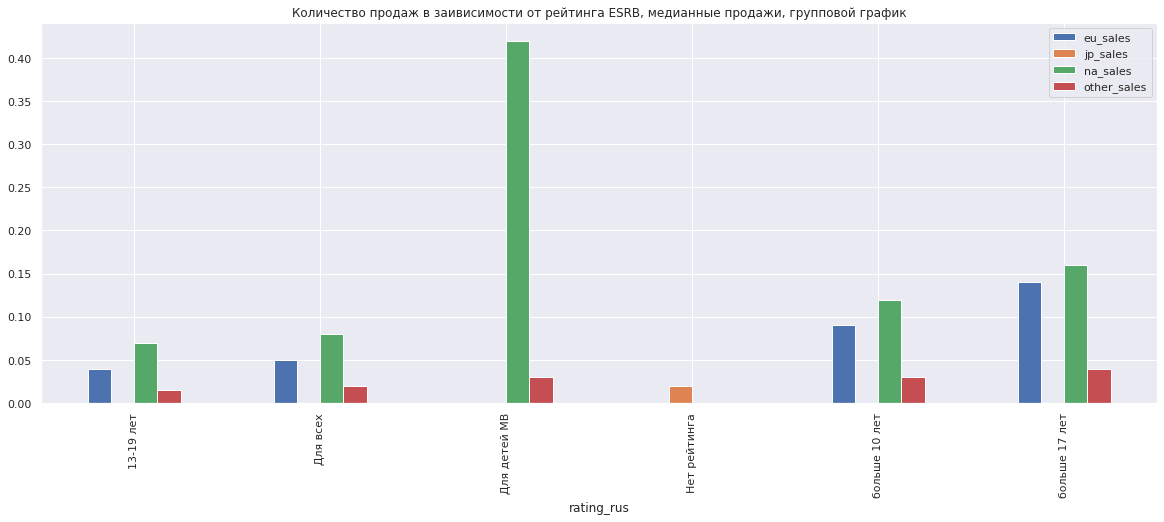

In [28]:
#Исследование влияния рейтинга ESRB на продажи в отдельном регионе по медианным продажам
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data_rating5 = data5.pivot_table(index = 'rating_rus', values = column, aggfunc = 'median').reset_index()
    data_rating5 = data_rating5.sort_values(by = column, ascending = False)
    display(data_rating5.head())
    data_rating5.plot(x = 'rating_rus', y = column, kind = 'bar', figsize=(12, 4), grid=True)
    plt.title('Количество продаж в заивисимости от рейтинга ESRB, медианные продажи')
    plt.show()
#построим групповой график по популярности жанров:
data_rating5 = data5.pivot_table(index = 'rating_rus', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'median').reset_index()
display(data_genre5.head())
data_rating5.plot(x = 'rating_rus', kind='bar', figsize=(20, 7), grid=True)
plt.title('Количество продаж в заивисимости от рейтинга ESRB, медианные продажи, групповой график')
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px;">
<b> Комментарий ревьюера</b>
    
Здесь необходимо рассмотреть также и отсутствующий возрастной рейтинг, предварительно заменив его на что-то. Эта задача является отличным примером того, что даже пропущенные значения могут нести в себе важную информацию.
</div>

**Вывод (Полностью обновлен)**

Были определены потребительские вкусы пользователей в разных регионах: в Северной Америке (NA), в Европе (EU), и Японии (JP) и других (Other).
1. Были выявлены самые популярные платформы (топ-5). 
    * В Северной Америке по объему продаж популярны приставки X360 и PS3, которые можно назвать условно устаревшими, потому что уже появились приставки нового поколения. Также популярны PS4, XOne и японская 3DS. Однако по медианным продажам есть отличия, здесь более популярны приставки Xbox, XOne, а также приставки Wii и WiiU, которые являются портативными и могут пользоваться болшим спросом из-за своей доступности. 
    * В Европе самая популярная по объему продаж приставка PS3 и PS4. За ними идут X360, 3DS и PC. По медианным продажам, как и в Северной Америке популярна также портативная приставка WiiU.
    * В Японии всё наоборот, поведение потребителей здесь не как в Европе и Северной Америке. Лидер - 3DS от японской компании Nintendo, за ней PS3, PSP, PSV и PS4. По медианным продажам лидеры топ-5 аналогичны. Особенность японских игроков в том, что они больше предпочитают портативные игровые устройства.
    * В других регионах предпочитают нечто среднее между выбором игроков из Северной Америки и Европы. По объему продаж лидируют приставки от SonyPlaystation - PS3 и PS4, затем идут приставки от Xbox - X360, XOne, также популярны яаонские 3DS. По медианным продажам также популярны портативные WiiU. 
2. Были ыявлены самые популярные жанры (топ-5). 
    * Почти полностью совпадают вкусы игроков из Северной Америки и Европы.Там популярны игры в жанре экшн, шутеры, спортивные игры, ролевые игры и другие. Однако, есть и отличия, в Европе еще выбирают гонки. По медианным продажам в этих двух регионах лидируют шутеры, за ними идут платформеры (предположительно это чаще игры для поративных устройств).
    * В Японии вкус немного отличается - на первом месте ролевые игры, далее экшны игры других жанров, файтинги и платформеры. По медианным продажам также популярые приключения. 
    * В других регионах вкус идентичен Северной Америке.
3. Были выявлены особенности влияния рейтинга ESRB на продажи в отдельном регионе. 
    * Во всех регионах, за исключением Японии сымыми продаваемыми играми являются игры с рейтингом "Больше 17 лет". В Японии больше продается игр отсутствующим рейтингом. На втором месте во всех регионах идут игры с рейтингом "Для всех". На третьем месте во всех регионах идут игры с отсутствующим рейтингом, а в Японии для возраста 13-19 лет. Далее идут игры для подростков. 
    * Однако, если посмотреть на медианные продажи, то ситуация иная, более популярными становятся игры для совокупной возратсной категории от 10 до 19 лет. На других рынках популярными являются игры для детей младшего возраста. 
    * Игры только для детей младшего возраста в большинстве регионов и игры только для взрослых не пользуются популярностью. Это может быть связано с тем, что родители сознательно ограничивают в последнее время своих детей от компьютерных игр, а взрослые не являются активными потребителями игр. Также стоит учесть, что игры с пометкой для взрослых могут иметь специфическое содержание.
4. После оценки портрета пользователей, можно сделать вывод, что в целом наиболее популярными являются игры для приставок от Sony Playstation и Xbox последних поколений. В Японии есть специфика, связанная с тем, что там популярны игры для национальной приставки 3DS. Можно отметить жанровое разнообразие во вкусах пользователей, однако больше предпочтение отдается экшнам, шутерам, рэйсингам и ролевым играм, но здесь стоит оценивать особенности каждого региона в отдельности. Наиболее востребованными играми являются игры с рейтингом Для всех. 
5. Стоит отдельно отметить, что медианные продажи свидетельтсвует о высокой частоте покупок игр для портативных устройств, пользователями которых чаще являются дети и подростки. Это отдельная группа потребителей, которая может гарантировать если не высокие продажи, то точно постоянные. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>

ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на западе и на востоке. Так или иначе, это очень показательный пример. Можно ли было об этом догадаться сразу? Да. Нас не просто так в каждой работе просят выдвигать предположения о природе пропусков, ведь иногда это очень помогает выбрать оптимальный метод их обработки.
</div>

### Проверьте гипотезы

In [29]:
#1 гипотеза. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#Н0 - средние пользовательские рейтинги платформ Xbox One и PC равны
#Н1 - средние пользовательские рейтинги платформ Xbox One и PC различны
display(data5.head())
Xone = data5[(data5['platform'] == 'XOne') & (data5['user_score'] != '-1')]['user_score']
pc = data5[(data5['platform'] == 'PC') & (data5['user_score'] != '-1')]['user_score']
print('Дисперсия пользовательского рейтинга Xbox One', np.var(Xone))
print('Дисперсия пользовательского рейтинга PC', np.var(pc))
alpha = 0.05
#проверим гипотезу, установим значение equal_var = True, так как дисперсии сопоставимы
results = st.ttest_ind(Xone, pc, equal_var = True)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различны")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC равны")                                            
#сравним, как отличаются рейтинги
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(Xone.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc.mean()))

,game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_rus,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,больше 17 лет,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,больше 17 лет,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,больше 17 лет,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,norating,Нет рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,norating,Нет рейтинга,14.60


Дисперсия пользовательского рейтинга Xbox One 12.36705305774558
Дисперсия пользовательского рейтинга PC 11.280255086868314
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC равны
Средняя оценка пользователей игр для платформы Xbox One  - 4.54
Средняя оценка пользователей игр для платформы PC - 4.88


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [33]:
#2 гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные
#Н0 - средние пользовательские рейтинги жанров Action и Sports равны
#Н1 - средние пользовательские рейтинги жанров Action и Sports различны
action = data5[(data5['genre'] == 'Action') & (data5['user_score'] != '-1')]['user_score']
sports = data5[(data5['genre'] == 'Sports') & (data5['user_score'] != '-1')]['user_score']
print('Дисперсия пользовательского рейтинга игр экшн', np.var(action))
print('Дисперсия пользовательского рейтинга спортивных игр', np.var(sports))
alpha = 0.05
#проверим гипотезу, установим значение equal_var = True, так как дисперсии сопоставимы
results = st.ttest_ind(action, sports, equal_var = True)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports различны")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports равны")                                            
#сравним, как отличаются рейтинги
print('Средняя оценка пользователей игр экшн  - {:.2f}'.format(action.mean()))
print('Средняя оценка пользователей спортивных игр - {:.2f}'.format(sports.mean()))

Дисперсия пользовательского рейтинга игр экшн 16.261054883481144
Дисперсия пользовательского рейтинга спортивных игр 10.44861258075295
Отвергаем нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports различны
Средняя оценка пользователей игр экшн  - 2.97
Средняя оценка пользователей спортивных игр - 3.70


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


**Вывод (Полностью обновлен)**

Проведена провекра гипотез: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; и Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевую гипотезу иы формулировали всегда исходя из того, что параметры двух выборок будут равны, так как речь идет об однородных характеристиках: пользователи оценивают игры по 10 бальной шкале по одинаковым для себя параметрам: сюжет, графика, геймплей, отсутствие ошибок и т.д. 

Проверив гипотезы в обоих случаях нулевая гипотеза **подтвердилась**. При сравнении значений рейтинга удалось установить, что рейтинг близки по своим значениям с неболшими различиями в долях:
1. Для платформ:
    * Средняя оценка пользователей игр для платформы Xbox One  - 4.54
    * Средняя оценка пользователей игр для платформы PC - 4.88
2. Для жанров:
    * Средняя оценка пользователей игр экшн  - 3.07
    * Средняя оценка пользователей спортивных игр - 2.21

**Общий вывод**

1. Для проведения исследования и с целью выявить определяющие успешность игры закономерности был предоставлен набор данных, содержащий основную информацию об играх, их жанрах, объеме продаж на основных игровых рынках Европы, Северной Америки и Японии, оценках критиков и пользователей и возрастных ограничениях, всего 11 столбцов и 16715 строк. 

2. В данных были обнаружены  проблемы с пропущенными значениями, неверным форматом даты.Пропуски могли возникнуть автоматически при сведении баз данных по различным платформам или жанрам, либо по причине неподдержания данных в актуальном состоянии, информация об играх могла формироваться в момент, когда оценки либо не были выставлены, либо не опубликованы. Также при визуальной оценке количества значений, можно предположить, то оценки, а также возрастной рейтинг не были выставлены по играм, кторые выпускались до начала использования системы рейтингования.

3. Была произведена обработка данных. Приведены названия столбцов к нижнему регистру. Изменен тип данных в столбцах с датой выхода игры и оценкой игроков. Обработаны данные со значением 'tbd'. Согласно данным портала fb.ru (URL: https://fb-ru.turbopages.org/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie) аббревиатура образована от To Be Determined, что дословно переводиться как "Требует определения". Этот рейтинг определеяется, когда игра имеет недостаточное количество отзывов для подсчета рейтинга. Это может быть связано ли с тем, что игра не популярна и в нее играет мало пользователей, либо игра вышла давно и тогда оценок не применяли, либо игра вышла недавно (относительно даты формирования датасета) и пользователи не успели ее оценить. Пропуски в столбце с датой релиза игры оставили без изменений, так как это всего 1,6% от всех данных. Произведена обработка данных возрастного рейтинга, система обозначений ESRB заменена на понятную. Данные взяты с русской Википедии: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

4. Проведен исследовательский анализ данных.  С 1980 по 1993 года включительно отмечаютсчя незначительные продажи. Сильный рост начинается с 1994 года. Пик продаж приходится на 2008 и 2009 годы, после чего начинается спад. Причинами роста продаж с 1994 года могут быть: открытие новых потребительских рынков, повышение спроса за счет, с одной стороны роста покупательской способности и привлекательности самих игр, с другой - с удешевлением производства как самого оборудования, так и разрабатываемых игр. Спад с 2010 года может быть связан с массовой доступностью компьютеров, а также высокого предложения мобильных решений: смартфонов и планшетных компьютеров. На данном этапе определим в качестве важного периода: 1994-2016 гг.

5. **Выявлены шесть платформ, лидирующих по объему продаж: PS2, X360, Wii, PS3, DS, PS. Во всех случаях наблюдаются снижения продаж по платформам к концу оцениваемого периода. Дополнительно взяли отсечку по новизне игр, в этом случае лидерами по спросу являются игры для "PS3", "X360", "PS4", "3DS", "XOne". Самые ранние игры по этой выборке появились в 2011 году, поэтому в качестве актуального периода исследования возьмем 5 лет - с 2011 до 2016 гг. При постройке диаграммы размаха для глобальных продаж по платформам обнаружены сильные выбросы у всех платформ. Дополнительно изучены границы нормальных значений и установлено максимальное нормальное значение для каждой платформы.**

6. Существует взаимосвязь между оценками критиков и пользователей с объемом продаж игр на 6 популярных платформах. Более высокая корреляция отмечена с оценками пользователей, это может быть связано с более высоким доверием покупаетелей игр личному опыту других игроков, нежели критиков. При оценке мы не стали удалять выбросы, так как эти продажи тоже чем-то обусловлены. Например, это может быть мода, популярность игры, ее реклама, любые факторы, которые влияют на поведение потребителей. Поэтому считаю, что эти данные в этом случае важны.

7. **При оценке распределения игр по жанрам удалось установить, что больше всего игр в жанре Action, на втором месте Sports и Misk, на третьем Adventure и Role-playing. Самыми прибыльными играми являются игры самого популярного жанра Action и Sports. При этом спортивные игры не являются самыми популярными, а скорее нишевые, рассчитанные на определенных игроков. Приключенческие игры (Adventure) являются достаточно распространенными, но не пользуются популярностью. Непопулярными также являются файтинги (Fighting) и стратегии (Strategy). Эти игры также являются нишевыми и интрересными только для определенных групп пользователей. В целом можно отметить взаимосвязь между количеством игр в жанре и их популярностью на рынке, корреляция составялет 0,85. Однако, при детально изучении продаж по жанрам и оценке их медианных значений и определении количества продаж на 1 единицу игры, самыми популярными жанрами являются шутеры, затем с отрывом в 2 раза идут спортивные игры, платформе и файтинги.**

7. **Определен жизненный цикл платформы, в среднем он составлет 7 лет.**

8. **После оценки портрета пользователей, можно сделать вывод, что в целом наиболее популярными являются игры для приставок от Sony Playstation и Xbox последних поколений. В Японии есть специфика, связанная с тем, что там популярны игры для национальной приставки 3DS. Можно отметить жанровое разнообразие во вкусах пользователей, однако больше предпочтение отдается экшнам, шутерам, рэйсингам и ролевым играм, но здесь стоит оценивать особенности каждого региона в отдельности. Наиболее востребованными играми являются игры с рейтингом Для всех. Стоит отдельно отметить, что медианные продажи свидетельтсвует о высокой частоте покупок игр для портативных устройств, пользователями которых чаще являются дети и подростки. Это отдельная группа потребителей, которая может гарантировать если не высокие продажи, то точно постоянные.**

9. **Проведена провекра гипотез: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; и Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Обе гипотезы подтвердились. Рейтинги в обоих случаях оказались равн с небольшими различиями в долях**. 

9. **К факторам, определяющим успешность прожади игр**, которые необходимо учитывать при планировании продаж игр, можно отнести:
    * Средний срок жизни платформ около 7 лет, стоит учитывать, что к концу этого периода интерес пользователей будет заничтельно снижаться. 
    * происходит постепенный отказ от платформенных решений. Наблюдается общее падение спроса с 2009 года. Это связано с тем, что потребители, воможно, предпочитают игры на мобильных устройствах: на смартфонах и планшетных компьютерах. Возможно в будущем значительная часть пользователей откажеться от покупки платформенных игр. 
    * При выборе игры пользователи больше доверяют другим пользователям, чем критикам, их личному опыту. Поэтому важно обращать на игры с высоким потребительским рейтингом. Однако, здесь также стоит обращать внимание на жанр, среди которых самыми популярными являются экшны и спортивные игры.
    * Необходимо учитывать возратсной рейтинг. Игры для всех и для подростков более востребованы. Игры для детей младшего возраста и игры только для взрослых пользуются малой популярностью. 
    * Необходимо учитывать национальные особенности при планировании продаж в разных странах. Например, в Японии отмечены особые вкусы к жанрам игр, которые отличаются от вкусов потребителей Евпропы и Северной Америки.
    * есть отдельная группа потребителей - дети, играющие в игры на поративных устройствах, которые могут обеспечить стабильные продажи

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>

Отлично!
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;">
<b> Комментарий ревьюера</b>
    
Хорошо. Не забудь обновить вывод.
</div>